<a href="https://colab.research.google.com/github/IvyAldama/EstructurasDeDatos/blob/main/Modelos_de_aprendizaje_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5. Modelos de aprendizaje no supervisado
## 5.1 Agrupamiento

Ya aprendiste sobre el machine learning supervisado, es decir, cuando se solicita algo en particular al modelo, se descifra el significado de los datos y se establecen las variables. Sin embargo, ¬øQu√© pasa cuando esto se desconoce?

Por ejemplo, si deseas hacer un modelo para predecir la mejor talla de ropa para una persona a partir de una foto, la operaci√≥n puede complicarse con un modelo supervisado, porque existen cuerpos diversos con diferentes alturas, anchos, tipos de piernas, torsos, longitud de brazos, etc. Dada la multiplicidad de variables de caracter√≠sticas y de etiquetas, no es posible controlarlo f√°cilmente.

Otro ejemplo de esto son las redes sociales. ¬øC√≥mo sabe TikTok que el contenido que publica un usuario es indebido, cuando debe buscar en todo el universo de videos que diariamente se comparten, frame por frame y pixel por pixel? ¬øSab√≠as que TikTok no permite subir videos que muestren un c√≥digo QR?

Los ingenieros de IA de la empresa entrenaron a los modelos para detectar este tipo de contenidos etiquetando videos similares ya identificados. Sin embargo, los usuarios encuentran formas de vulnerar esta restricci√≥n. Entonces, ¬øc√≥mo sigue aprendiendo el modelo? La respuesta es: mediante aprendizaje no supervisado, pues de esta manera no debe esperar una etiqueta de por medio, simplemente agrupa los videos conforme a sus caracter√≠sticas.

Lejos de lo que pueda pensarse, los aprendizajes supervisado y no supervisado no son contrarios, por el contrario, pueden ser buenos complementos.

Ahora bien, uno de los m√©todos iniciales del aprendizaje no supervisado es el clustering.

### ¬øQu√© es el clustering?
Un ni√±o aprende a diferenciar animales. Cuando es peque√±o, no tiene idea de qu√© es esa forma peluda, que mueve la cola, con orejas paradas y jadeante que tiene frente a s√≠. Entonces, cuando un adulto se√±ala que es un perro, el ni√±o asocia las caracter√≠sticas con el nombre. Independientemente de la raza o talla identifica que otro animal con las mismas caracter√≠sticas tambi√©n puede ser perro. Cuando se encuentre un ser con astas, m√°s grande, que come pasto y no ladra, notar√° que este no es un perro y ubica dicho animal en otra categor√≠a, aunque posteriormente descubra la o noci√≥n de "venado".

De una forma similar, la clusterizaci√≥n agrupa elementos en grupos o cl√∫steres significativos. Por lo regular, hacer esto revela patrones en los datos que representan un primer paso √∫til en el proceso de Machine Learning. Entonces, el clustering es una tarea de aprendizaje autom√°tico no supervisado.

Un ejemplo simple de la vida real del principio de clustering es la recopilaci√≥n de datos sobre el tama√±o del hogar y sus ingresos para crear grupos de usuarios, como familias peque√±as que gastan mucho, familias peque√±as que gastan poco, familias grandes que gastan mucho y familias grandes que gastan poco.

El proceso est√°ndar de clustering se divide en los siguientes pasos:

Extracci√≥n y selecci√≥n de caracter√≠sticas: extraer y seleccionar las caracter√≠sticas m√°s representativas del conjunto de datos original.
Dise√±o del algoritmo de agrupamiento: dise√±ar el algoritmo de agrupamiento de acuerdo con las caracter√≠sticas del problema.
Evaluaci√≥n de resultados: evaluar el resultado de la agrupaci√≥n y juzgar la validez del algoritmo.
Explicaci√≥n del resultado: ofrecer una explicaci√≥n pr√°ctica del resultado del clustering.
Luego de entender qu√© es el clustering, es momento de abordar la parte pr√°ctica de esta semana.

## Clustering jer√°rquico
El clustering jer√°rquico, tambi√©n conocido como an√°lisis de conglomerados jer√°rquicos, es un algoritmo que agrupa objetos similares en grupos llamados conglomerados. El resultado es un conjunto de cl√∫steres, donde cada uno es distinto de los dem√°s y los objetos dentro son muy similares entre s√≠.

Esta aproximaci√≥n es adecuada para datos jer√°rquicos y crea un √°rbol de cl√∫steres.

Ejemplo:

Para comenzar, descarga este dataset con datos de un departamento de marketing y c√°rgalo en un Data Frame: https://drive.google.com/file/d/17rz2cPK0FxW5I9HfgCSjkA8IiUi3YAaU/view?usp=sharing



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/marketing-data.csv')
df.head()

df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Aqu√≠, se aprecia que el marketing ha generado un CustomerID, mediante el cual reuni√≥ Genre, Age, Annual Income+(en miles de d√≥lares) y un Spending Score de 1 a 100 para cada uno de los 200 clientes.

Cuando se solicit√≥ una aclaraci√≥n al departamento de marketing, estos se√±alaron que los valores en la columna Spending Score representan la frecuencia con que una persona gasta dinero en un centro comercial en una escala de 1 a 100.

En otras palabras, si un cliente tiene una puntuaci√≥n de 0 significa que nunca gasta dinero; en cambio, si la puntuaci√≥n es 100, entonces es quien gasta m√°s.

Los h√°bitos de gasto de los usuarios pueden inspeccionarse f√°cilmente por medio de un histograma.


<Axes: >

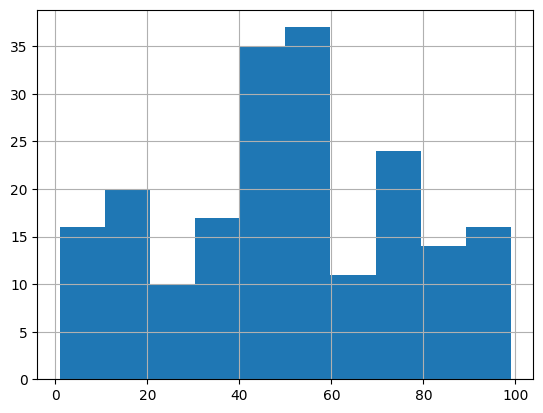

In [ ]:
df['Spending Score (1-100)'].hist()

Al observar el histograma,se aprecia que m√°s de 35 clientes tienen puntajes entre 40 y 60, asimismo, que poco menos de 25 tienen puntajes entre 70 y 80. Por lo anterior, la mayor√≠a de los clientes son gastadores equilibrados, seguidos de gastadores moderados a altos. Tambi√©n se muestra una l√≠nea despu√©s de 0, a la izquierda de la distribuci√≥n, y otra l√≠nea antes de 100, a la derecha de la distribuci√≥n. Estos espacios en blanco probablemente significan que los datos no contiene personas que no gastan, que tendr√≠an una puntuaci√≥n de 0, y que tampoco hay personas que gastan mucho con una puntuaci√≥n de 100.

Para verificar si todas est√°s afirmaciones son ciertas, se analizan los valores m√≠nimos y m√°ximos de la distribuci√≥n. Estos se encuentran con la funci√≥n describe().

Por otro lado, con transpose() la tabla se cambia de lugar para obtener los datos seg√∫n la preferencia de visualizaci√≥n.

In [ ]:
df.describe().T


count    mean        std   min    25%    50%     75%  \
CustomerID              200.0  100.50  57.879185   1.0  50.75  100.5  150.25   
Age                     200.0   38.85  13.969007  18.0  28.75   36.0   49.00   
Annual Income (k$)      200.0   60.56  26.264721  15.0  41.50   61.5   78.00   
Spending Score (1-100)  200.0   50.20  25.823522   1.0  34.75   50.0   73.00   

                          max  
CustomerID              200.0  
Age                      70.0  
Annual Income (k$)      137.0  
Spending Score (1-100)   99.0

Esto confirma las hip√≥tesis anteriores. Tambi√©n se observa un comportamiento similar para la columna Annual Income; para demostrarlo, se puede generar un histograma apuntando a esta columna.

<Axes: >

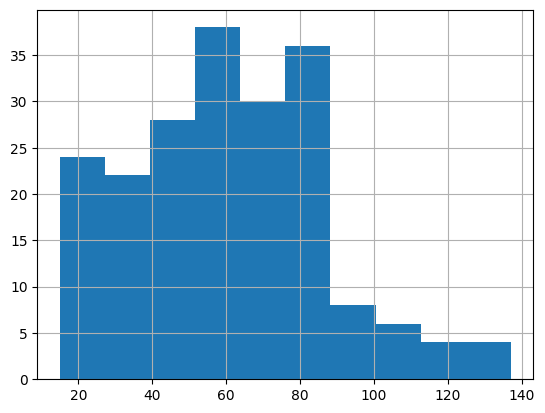

In [ ]:
df['Annual Income (k$)'].hist()



En el histograma se advierte que m√°s de 35 clientes se concentran cerca del n√∫mero 60. Esto resulta de suma utilidad para agrupar a los clientes por medio de Annual Income, aunque todav√≠a se necesita m√°s informaci√≥n.

A continuaci√≥n, se muestra nuevamente un fragmento de los datos:


In [ ]:
df.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Con esta muestra se sabe que aparecen dos g√©neros. Si se desea usar esta funci√≥n en el modelo, Male podr√≠a transformarse a  0  y Female en  1 . Tambi√©n es importante comprobar la proporci√≥n entre g√©neros, para corroborar que est√°n equilibrados. Esto se ejecuta con el m√©todo value_counts() para mostrar el porcentaje entre Male y Female:


In [ ]:
df['Genre'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Genre, dtype: float64

En el conjunto de datos existe un 56% de mujeres y 44% de hombres. La diferencia entre ellos es solo de 16%. Pese a no tener una distribuci√≥n 50/50, las cifras est√°n lo suficientemente equilibradas, as√≠ que no suponen un problema.

Hasta ahora, todas las caracter√≠sticas se exploraron con facilidad, excepto por Age. Para Age, el rasgo se divide en bins para segmentar a los clientes en funci√≥n de sus grupos de edad. Al hacerlo, las categor√≠as de edad en un n√∫mero deben transformarse antes de agregarlas al modelo. De esa forma, en lugar de usar la categor√≠a 15-20 a√±os, se contabiliza el n√∫mero de clientes en dicha categor√≠a y esto se convertir√≠a en un n√∫mero en una nueva columna llamada "15-20".

In [ ]:
# Definimos los intervalos en los que cortaremos los datos
intervalos = [15, 20, 30, 40, 50, 60, 70]

# Definimos las columnas a cortar
columnas = df['Age']

# Se cortan los datos con la funci√≥n cut()
df['Grupos de Edad'] = pd.cut(x=columnas, bins=intervalos)

df['Grupos de Edad']

0      (15, 20]
1      (20, 30]
2      (15, 20]
3      (20, 30]
4      (30, 40]
         ...   
195    (30, 40]
196    (40, 50]
197    (30, 40]
198    (30, 40]
199    (20, 30]
Name: Grupos de Edad, Length: 200, dtype: category
Categories (6, interval[int64, right]): [(15, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] <
                                         (60, 70]]

A continuaci√≥n, se determinar√° el n√∫mero de clientes por categor√≠a:

In [ ]:
df.groupby('Grupos de Edad')['Grupos de Edad'].count()

Grupos de Edad
(15, 20]    17
(20, 30]    45
(30, 40]    60
(40, 50]    38
(50, 60]    23
(60, 70]    17
Name: Grupos de Edad, dtype: int64

Es f√°cil detectar que la mayor√≠a de los clientes tiene entre 30 y 40 a√±os, seguidos por los clientes entre 20 y 30 y en tercer lugar los clientes entre 40 y 50. Esta tambi√©n es una buena informaci√≥n para el departamento de Marketing.

Por el momento, se tienen dos variables categ√≥ricas, Age y Genre, que requieren una transformaci√≥n en n√∫meros para usarlas en el modelo. Para ello, se recurre al m√©todo get_dummies(), que crea una nueva columna para cada intervalo y g√©nero; luego, llena sus valores con 0 y 1. Este procedimiento se denomina one-hot

In [ ]:
df_oh = pd.get_dummies(df)
df_oh

CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1   19                  15                      39   
1             2   21                  15                      81   
2             3   20                  16                       6   
3             4   23                  16                      77   
4             5   31                  17                      40   
..          ...  ...                 ...                     ...   
195         196   35                 120                      79   
196         197   45                 126                      28   
197         198   32                 126                      74   
198         199   32                 137                      18   
199         200   30                 137                      83   

     Genre_Female  Genre_Male  Grupos de Edad_(15, 20]  \
0               0           1                        1   
1               0           1                        0   
2               1           0                        1   
3               1           0                        0   
4               1           0                        0   
..            ...         ...                      ...   
195             1           0                        0   
196             1           0                        0   
197             0           1                        0   
198             0           1                        0   
199             0           1                        0   

     Grupos de Edad_(20, 30]  Grupos de Edad_(30, 40]  \
0                          0                        0   
1                          1                        0   
2                          0                        0   
3                          1                        0   
4                          0                        1   
..                       ...                      ...   
195                        0                        1   
196                        0                        0   
197                        0                        1   
198                        0                        1   
199                        1                        0   

     Grupos de Edad_(40, 50]  Grupos de Edad_(50, 60]  Grupos de Edad_(60, 70]  
0                          0                        0                        0  
1                          0                        0                        0  
2                          0                        0                        0  
3                          0                        0                        0  
4                          0                        0                        0  
..                       ...                      ...                      ...  
195                        0                        0                        0  
196                        1                        0                        0  
197                        0                        0                        0  
198                        0                        0                        0  
199                        0                        0                        0  

[200 rows x 12 columns]

La columna Grupos de Edad se dividi√≥ en 6 nuevas columnas, una para cada intervalo, como Grupos de Edad_(15, 20], Grupos de Edad_(20, 30], etc.

De la misma manera, en Genre, cuando el cliente tiene 18 a√±os, el valor de Grupos de Edad_(15, 20] es 1 y el valor de todas las dem√°s es 0.

Para las necesidades de agrupamiento, la m√©todo one-hot parece funcionar. Adem√°s, se pueden graficar los datos para analizar si realmente hay grupos distintos para agrupar.

El dataset tiene 11 columnas. Para visualizarlas, existen algunas alternativas.

Trazar el dataset en 10 dimensiones (lo cual supone un alto grado de complejidad). Se determina este n√∫mero porque Customer_ID no se considera como columna.

Trazar las caracter√≠sticas num√©ricas iniciales.

Transformar las 10 caracter√≠sticas en 2, pues as√≠ se reducen las dimensiones.

Dado que trazar 10 dimensiones es poco viable, en este caso se optar√° por el segundo enfoque, es decir, por trazar las caracter√≠sticas iniciales.

Para el clustering inicial es posible elegir dos caracter√≠sticas. Una forma de ver todos los pares de datos combinados es con ayuda del m√©todo de Seaborn pairplot()


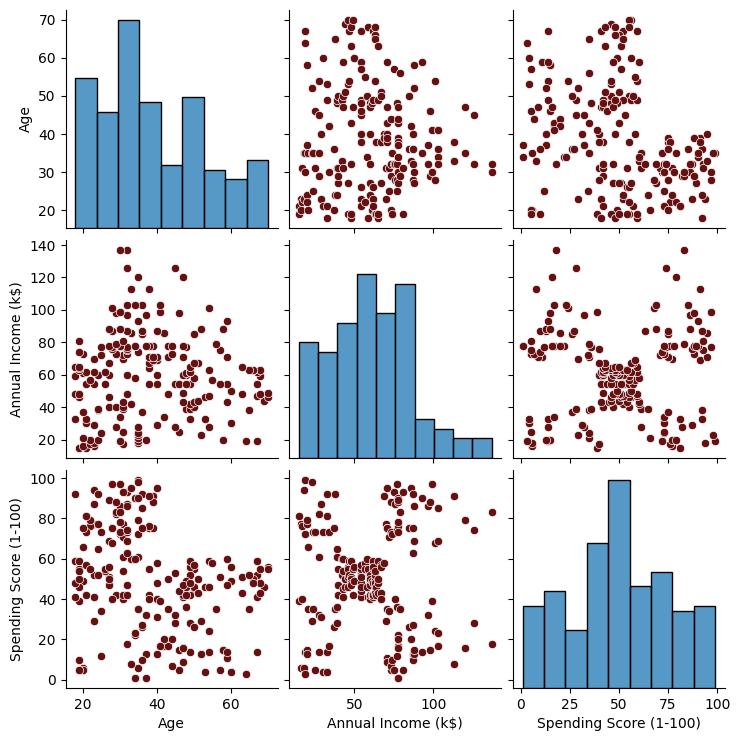

In [ ]:
# Aqu√≠ quitamos la columna CustomerID de los datos
df_data = df.drop('CustomerID', axis=1)

sns.pairplot(df_data, plot_kws={"color": '#661111'})

Es posible detectar que los diagramas de dispersi√≥n parecen tener grupos de datos. Uno que puede utilizarse es el diagrama de dispersi√≥n que combina Annual Income y Spending Score, es decir, el segundo de la tercera fila de gr√°ficas, pues parece que los datos se agrupan en cinco cl√∫steres.

Es importante considerar solamente dos caracter√≠sticas para agrupar a los clientes. Cualquier otra informaci√≥n sobre ellos no forma parte del proceso. Esto le da sentido al an√°lisis, pues si se averigua cu√°nto gana y gasta un cliente, entonces resultar√° m√°s f√°cil hallar las similitudes requeridas.

Ahora sigue un paso necesario en ejercicios de clustering y es el An√°lisis de Componentes Principales. Por ahora lo trataremos de manera sencilla y despu√©s en este m√≥dulo profundizaremos en ello.

### An√°lisis de componentes principales (PCA)

Al parecer, este enfoque brinda un buen resultado. Sin embargo, podr√≠a recurrir al tercer m√©todo antes mencionado. Este puede ser √∫til cuando no es posible graficar los datos porque tienen demasiadas dimensiones o cuando no existan concentraciones de datos o separaci√≥n clara en grupos. En estos casos, se recomienda reducir las dimensiones de los datos con un m√©todo llamado Principal Component Analysis (PCA) o An√°lisis de componentes principales.

Esto reducir√° las dimensiones de los datos mientras preserva la mayor cantidad de informaci√≥n posible.

Para cada par de caracter√≠sticas, PCA analiza si los valores mayores de ambas variables corresponden entre s√≠ y repite la operaci√≥n con los valores menores. Entonces, calcula la variaci√≥n de los valores de las caracter√≠sticas mediante un procedimiento denominado covarianza. Posteriormente, esos resultados se organizan en una matriz de covarianza.

Antes de aplicar PCA, se selecciona entre la columna Age o las columna Grupos de Edad en los datos previamente codificados con on-hot. Dado que ambas columnas representan la misma informaci√≥n, introducirla dos veces afecta la varianza. Por otra parte, si se eligen las columnas Grupos de Edad, simplemente se elige la columna Age con la funci√≥n drop() de Pandas.


In [ ]:
df_oh = df_oh.drop(['Age'], axis=1)
df_oh.shape

(200, 11)

Para calcular la varianza de cada dimensi√≥n se usa PCA de Scikit-Learn. Se calcula la varianza explicada de cada dimensi√≥n, dada por explained_variance_ratio_ y enseguida se ejecuta la suma acumulada con cumsum().

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3) # Establecemos el PCA de todos los componentes
p=pca.fit_transform(df_oh) # Lo aplicamos a nuestro dataset codificado
pca.explained_variance_ratio_.cumsum() # Calculamos las varianzas acumuladas explicadas

p.shape

(200, 3)

Ejecutando el fragmento de c√≥digo anterior apreciamos que la primera dimensi√≥n explica 50% de los datos y, al combinarse con la segunda, ambas arrojan un resultado de 99%, es decir, las 2 primeras dimensiones cubren los datos casi por completo. Entonces, al aplicar un PCA con 2 componentes, se obtienen los elementos necesarios para graficar:

<Axes: >

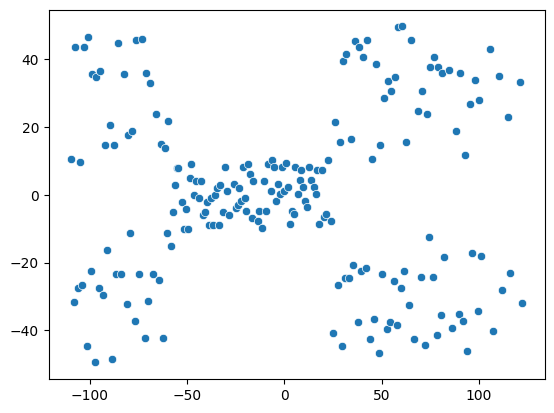

In [ ]:
pca = PCA(n_components=10) # Establecemos el PCA de 2 componentes
pcs = pca.fit_transform(df_oh) # Lo aplicamos a nuestro dataset codificado

# Gr√°ficamos
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

(<Axes: ylabel='Frequency'>, <Axes: ylabel='Density'>)

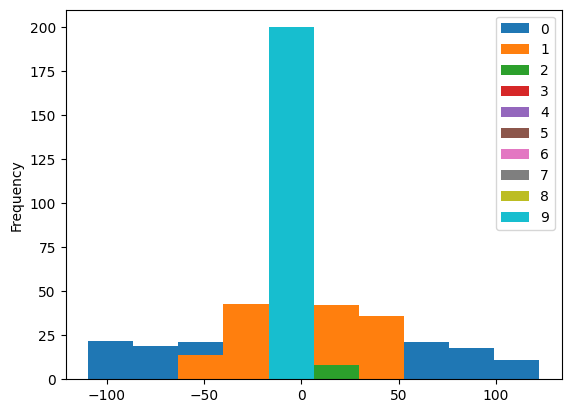

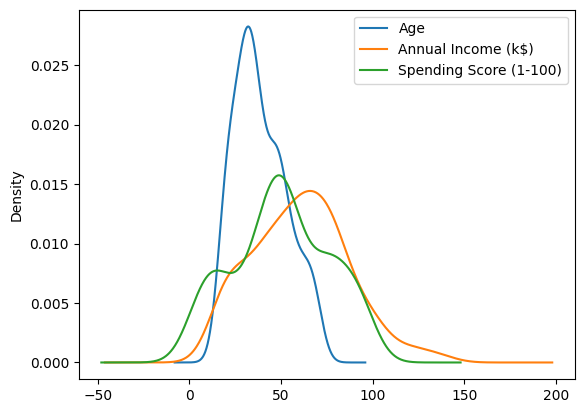

In [ ]:
dfpcs=pd.DataFrame(pcs)
dfpcs.plot(kind='hist'), df.iloc[:,1:].plot(kind='kde')


La gr√°fica de datos despu√©s de PCA es muy similar a aquella que usa solo dos columnas de datos sin PCA.

Dendrogramas

Estos √∫ltimos gr√°ficos identifican que existen 5 cl√∫steres en los dados, pero tambi√©n es posible visualizar las relaciones entre puntos para determinar la cantidad de cl√∫steres mediante la creaci√≥n de un dendrograma

El dendrograma es el resultado de la vinculaci√≥n de puntos en un conjunto de datos. Es una representaci√≥n visual del proceso de clustering jer√°rquico.

Un Hierarchical Clustering Algorithm (HCA) o algoritmo de clustering jer√°rquico comienza a vincular los puntos y encontrar agrupamientos.

Primero, se dividen los puntos en 2 grandes grupos y luego cada uno se subdivide en 2 m√°s peque√±os formando as√≠ cuatro grupos.Esto se conoce como m√©todo divisivo y con enfoque de arriba hacia abajo.

Por otro lado, se puede hacer lo opuesto; es decir, mirar todos los puntos de datos, encontrar los 2 m√°s cercanos entre s√≠, vincularlos y hallar otros puntos suficientemente cerca de los anteriores para seguir construyendo grupos. A esto se le denomina m√©todo aglomerativo de abajo hacia arriba.

Pasos para realizar un AHC

Para realizar un algoritmo de Agglomerative Hierarchical Clustering (AHC) se sigue una serie de pasos:

1. Para iniciar, trata cada punto de datos como un grupo. As√≠, la cantidad de grupos al principio ser√°  ùêæ , mientras que  ùêæ  es un n√∫mero entero que representa la cantidad de puntos de datos.
2. Forma un grupo uniendo los dos puntos de datos m√°s cercanos que arrojen como resultado grupos  ùêæ‚àí1 .
3. Forma m√°s grupos uniendo los dos grupos m√°s cercanos que dan como resultado grupos  ùêæ‚àí2 .
4. Repite los tres pasos anteriores hasta formar un grupo grande.

Para comenzar el AHC se grafica un dendrograma de los datos de los clientes para visualizar las relaciones jer√°rquicas.


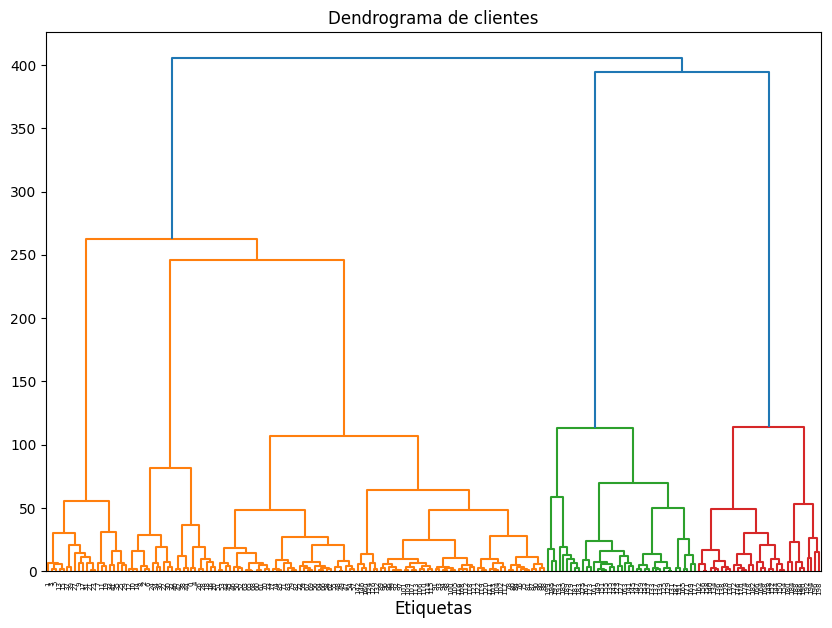

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendrograma de clientes")


# Seleccionamos Annual Income y Spending Scores como indices
selected_data = df_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data,
            method='ward',
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.xlabel("Etiquetas", fontsize=12)
plt.show()

En el script anterior, se generaron los grupos y subgrupos con los puntos, se defini√≥ la vinculaci√≥n entre puntos (aplicando el m√©todo ward) y c√≥mo medir la distancia entre puntos (usando la m√©trica euclidean).

Con el gr√°fico del dendrograma, es posible visualizar los procesos descritos de DHC y AHC. Para el enfoque de arriba hacia abajo, se inicia desde la parte superior del dendrograma; en caso contrario, para visualizar el enfoque de abajo hacia arriba se comienza en la parte inferior.

### M√©todos de vinculaci√≥n

Existen diversos m√©todos de vinculaci√≥n y al comprender mejor su funcionamiento, ser√° posible elegir el adecuado para las necesidades del modelo. Adem√°s, cada uno arrojar√° resultados diferentes cuando se apliquen. No hay una regla fija en el an√°lisis de cl√∫steres; no obstante, si es posible estudia primero la naturaleza del problema, para seleccionar aquel que se ajusta mejor, prueba diferentes m√©todos e inspecciona los resultados.

Algunos m√©todos son:

**Vinculaci√≥n simple**: tambi√©n conocido como vecino m√°s cercano o Nearest Neighbor (NN). La distancia entre clusteres se define por la distancia entre sus miembros m√°s cercanos.


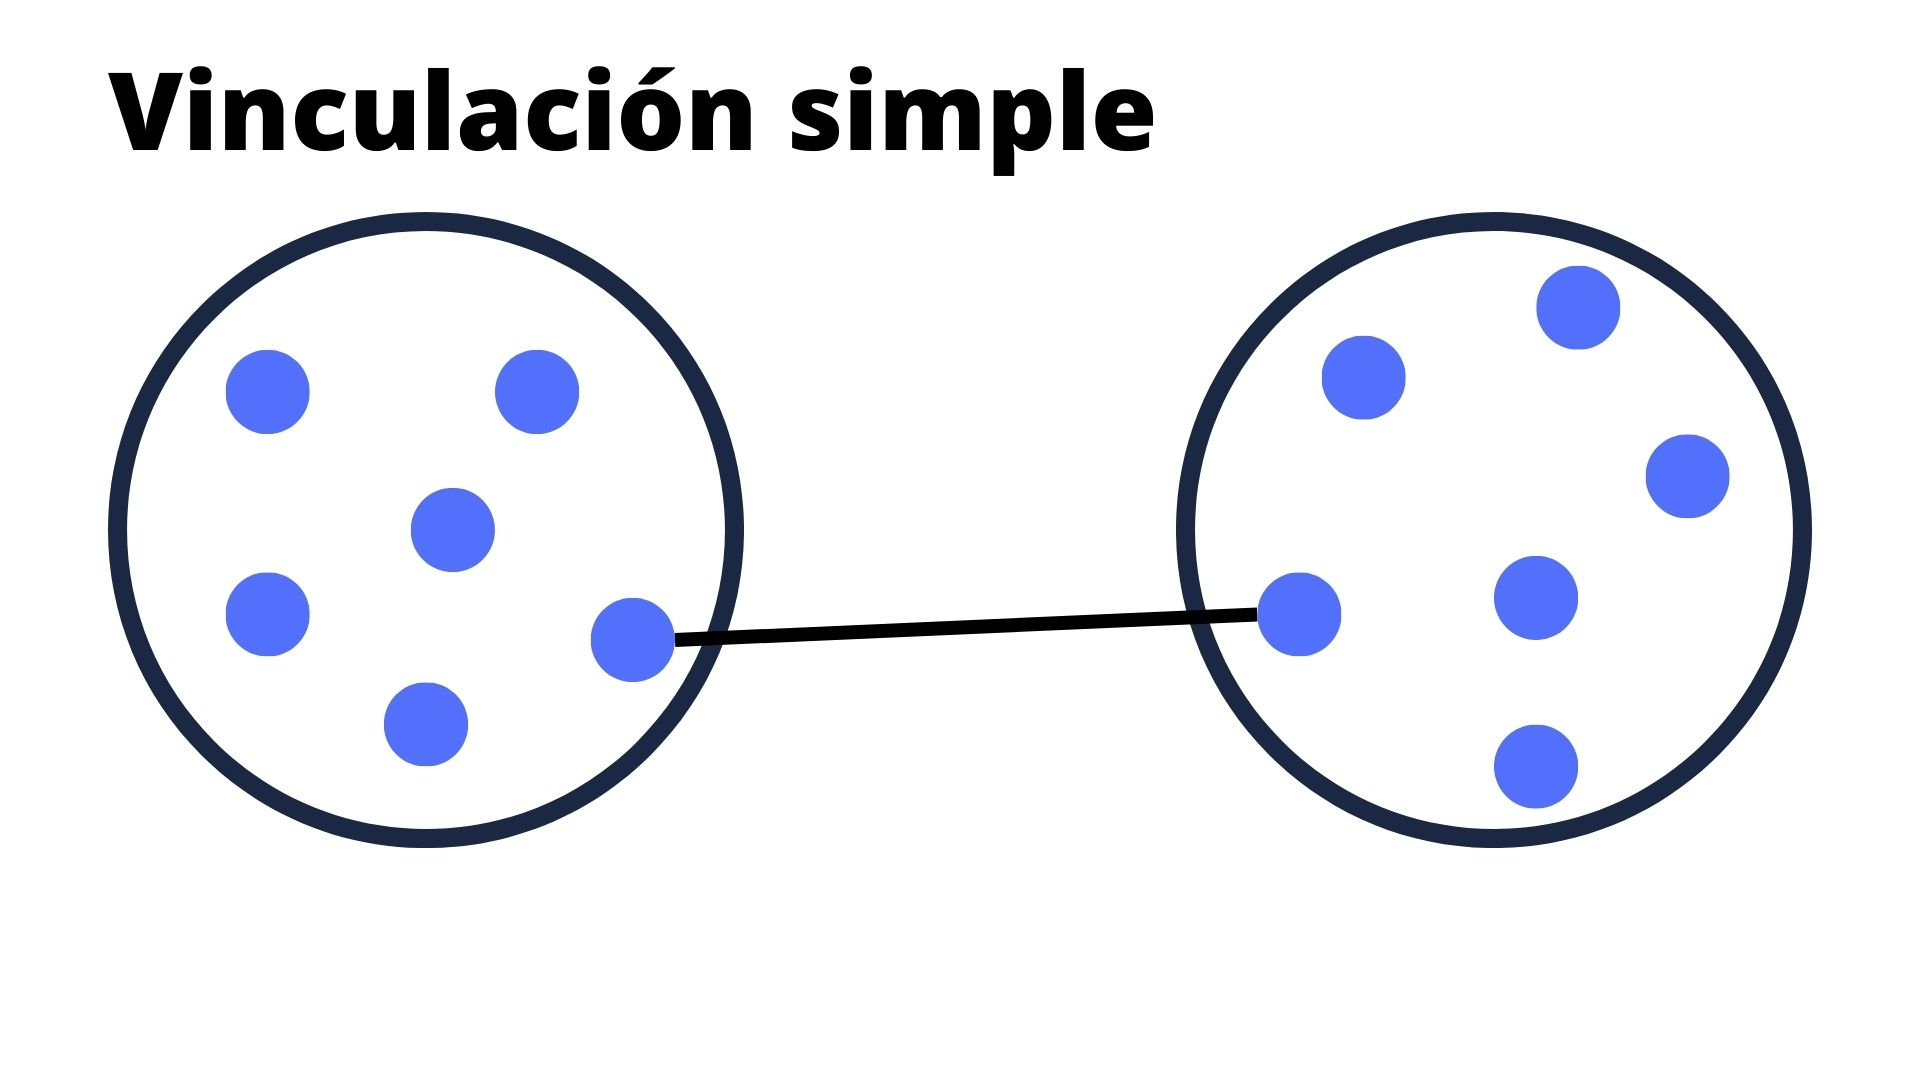

**Vinculaci√≥n completa:** tambi√©n conocido como Vecino m√°s lejano o Furthest Neighbor (FN). La distancia entre grupos se define por la distancia entre sus miembros m√°s lejanos. Este m√©todo es m√°s costoso para la computadora, es decir, demanda m√°s recursos.

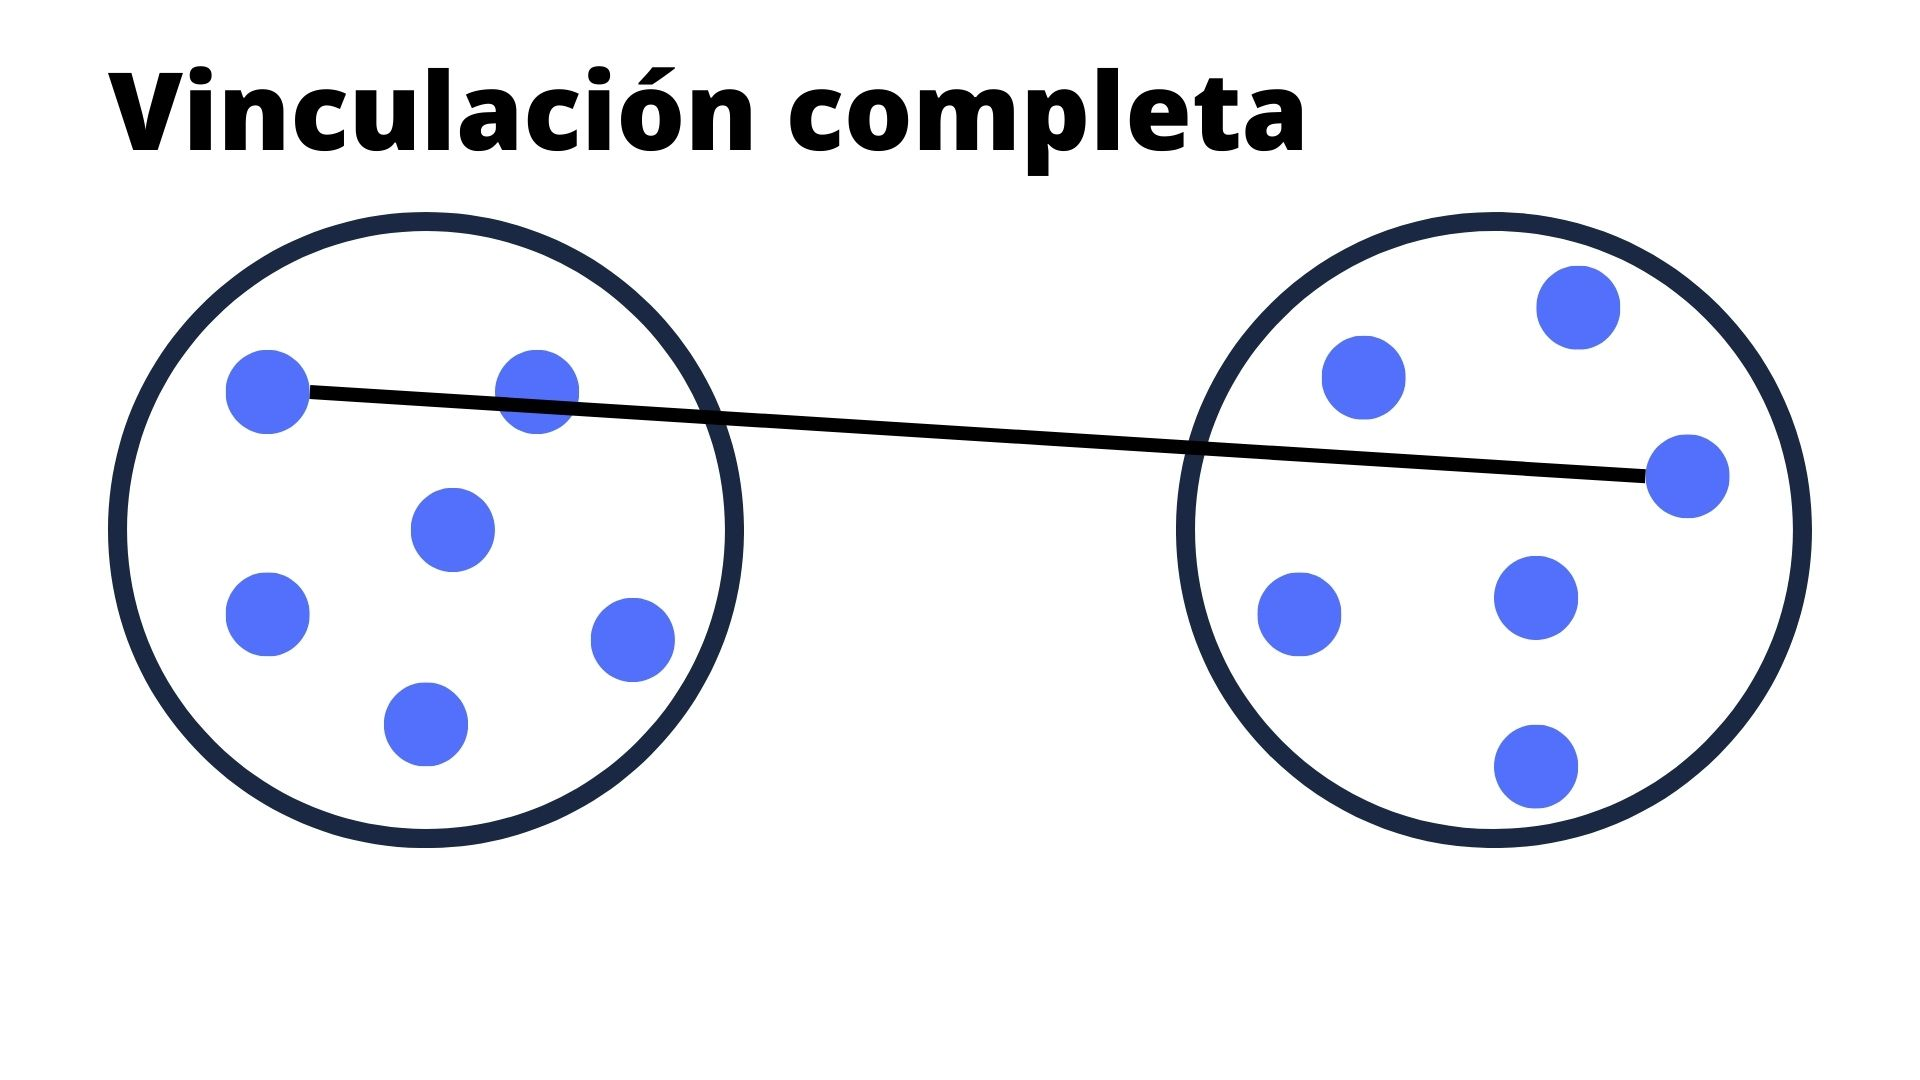

**Vinculaci√≥n promedio**: tambi√©n conocido como UPGMA (Weighted Pair Group Method with Arithmetic mean). El porcentaje del n√∫mero de puntos de cada cl√∫ster se calcula con respecto al n√∫mero de puntos de los dos cl√∫steres si estuvieran fusionados.

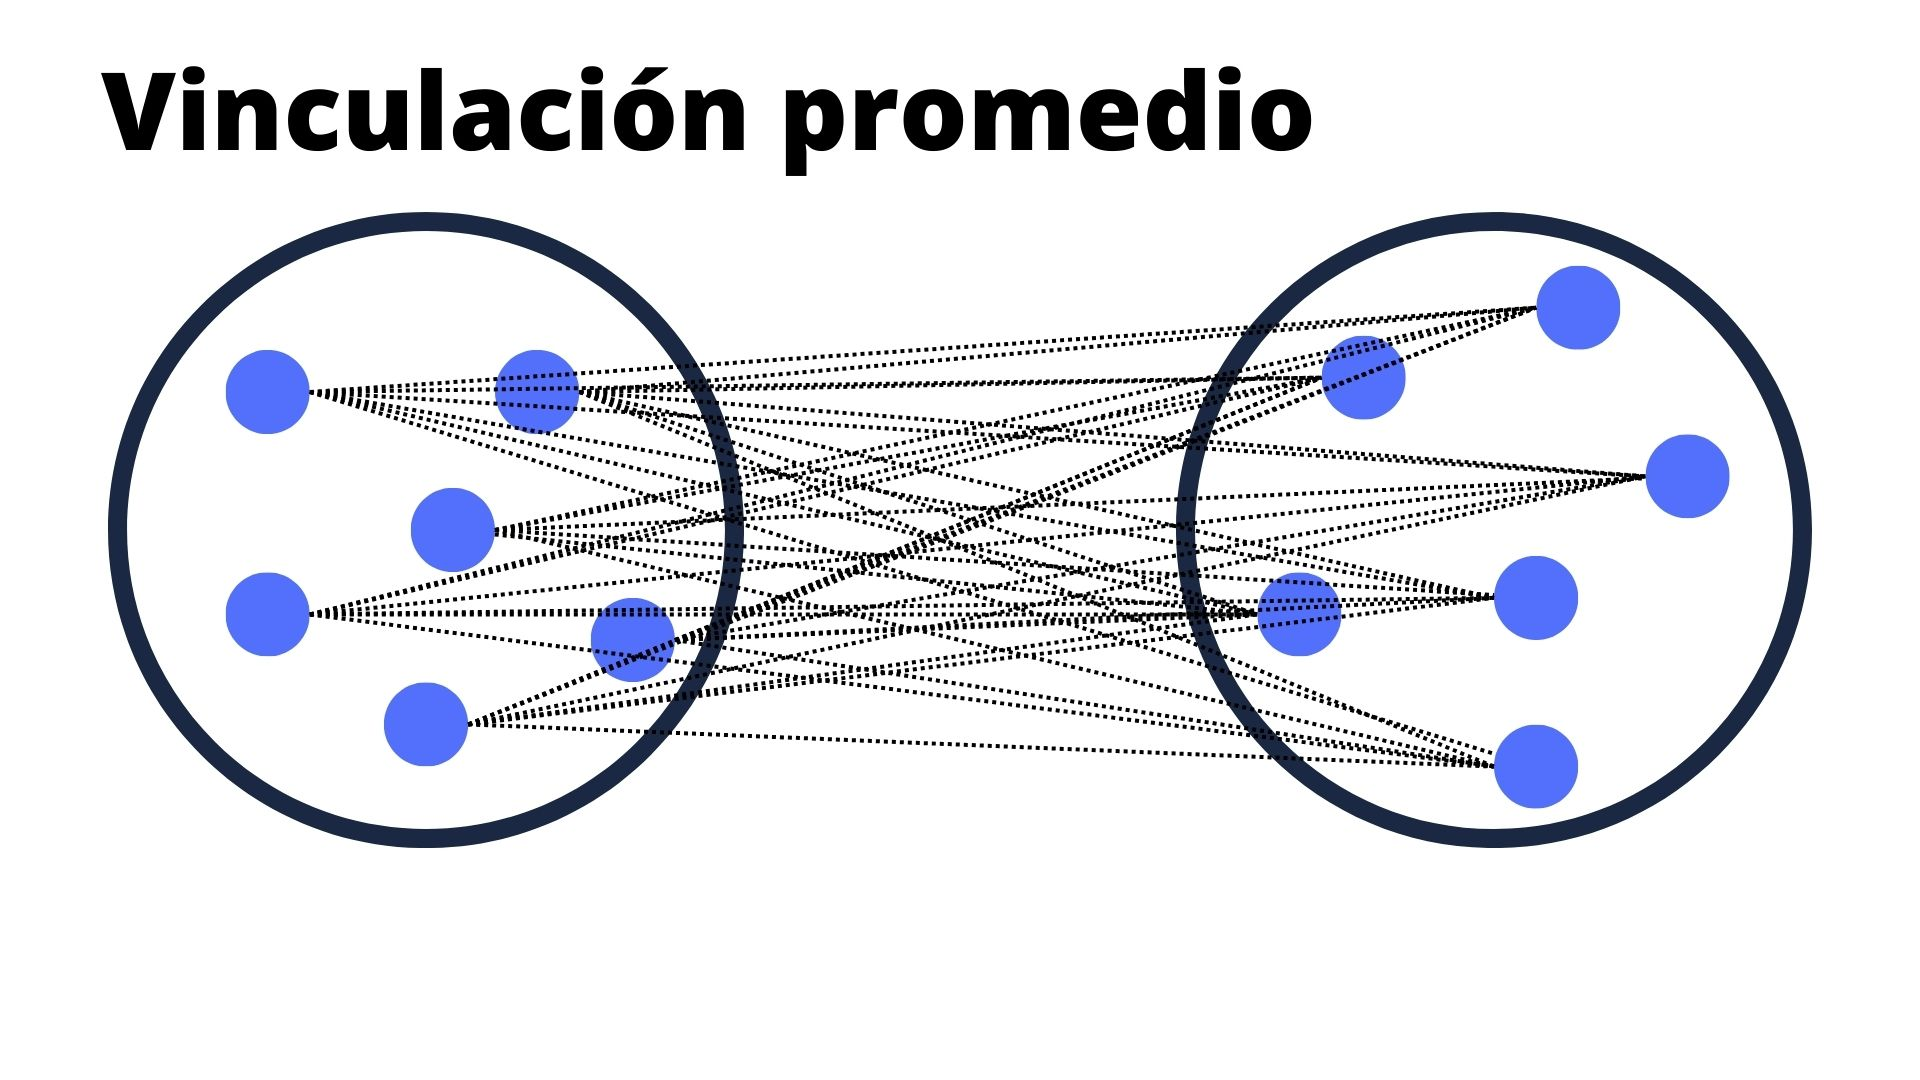

**Vinculaci√≥n centroide**: tambi√©n conocido como UPGMC (Unweighted Pair Group Method using Centroids). Se calcula un punto definido por la media de todos los puntos (centroide) para cada grupo y la distancia es la existente entre sus respectivos centroides.

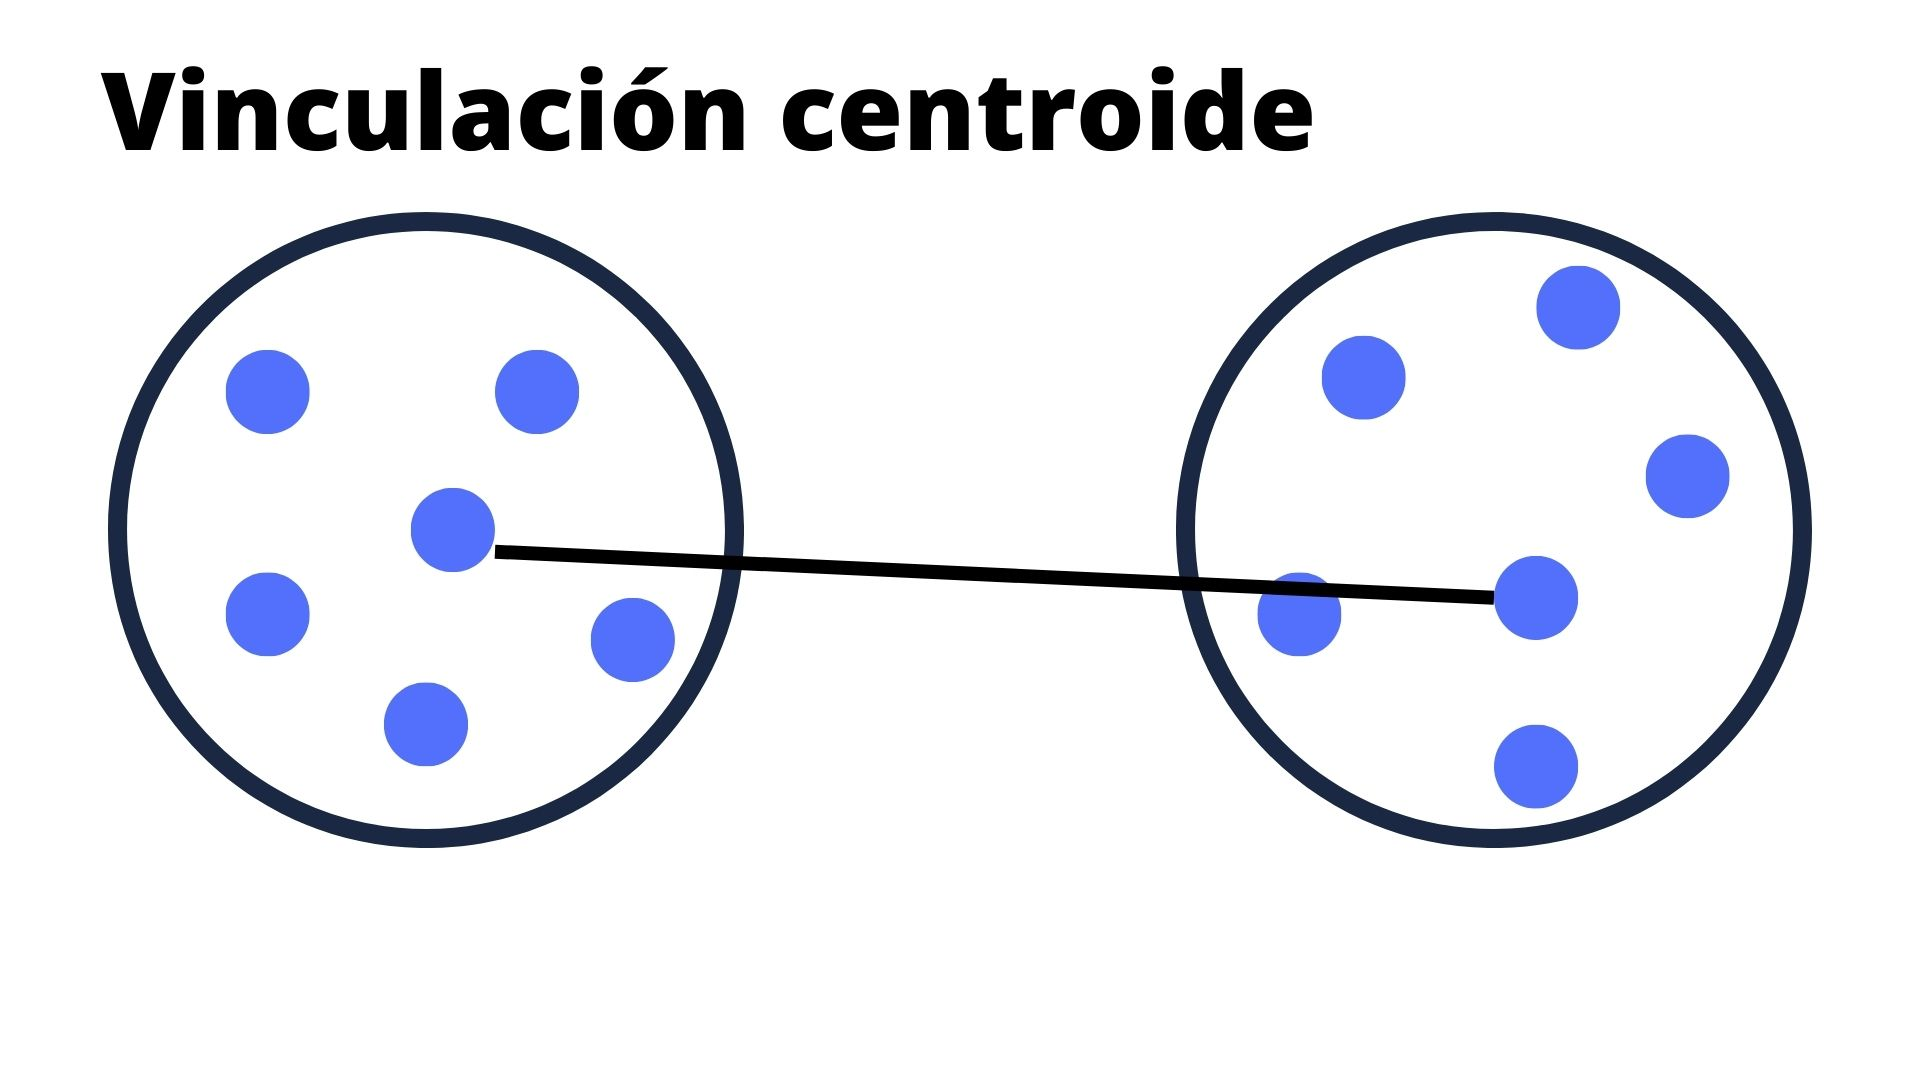

### M√©tricas de distancia
Adem√°s de la vinculaci√≥n, tambi√©n es posible especificar algunas de las m√©tricas de distancia m√°s utilizadas:

**Euclidiana**: tambi√©n conocida como pitag√≥rica o distancia en l√≠nea recta. Calcula la distancia entre dos puntos en el espacio, midiendo la longitud de un segmento de l√≠nea que pasa entre ellos. Utiliza el teorema de Pit√°goras y el valor de la distancia es el resultado (c) de la ecuaci√≥n:

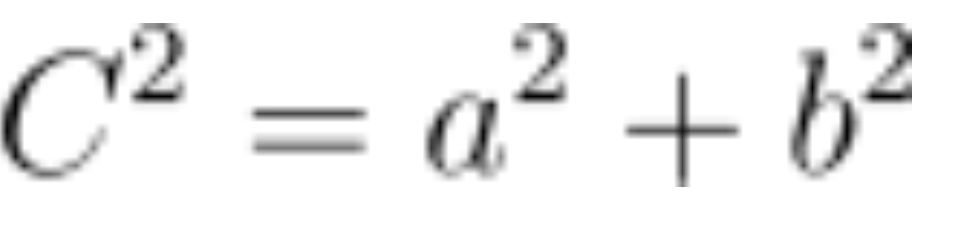

**Manhattan**: tambi√©n llamado City-block o distancia en taxi. Es la suma de las diferencias absolutas entre las medidas en todas las dimensiones de dos puntos. Si estas dimensiones son dos, es similar a girar a la derecha y luego a la izquierda al caminar una cuadra.

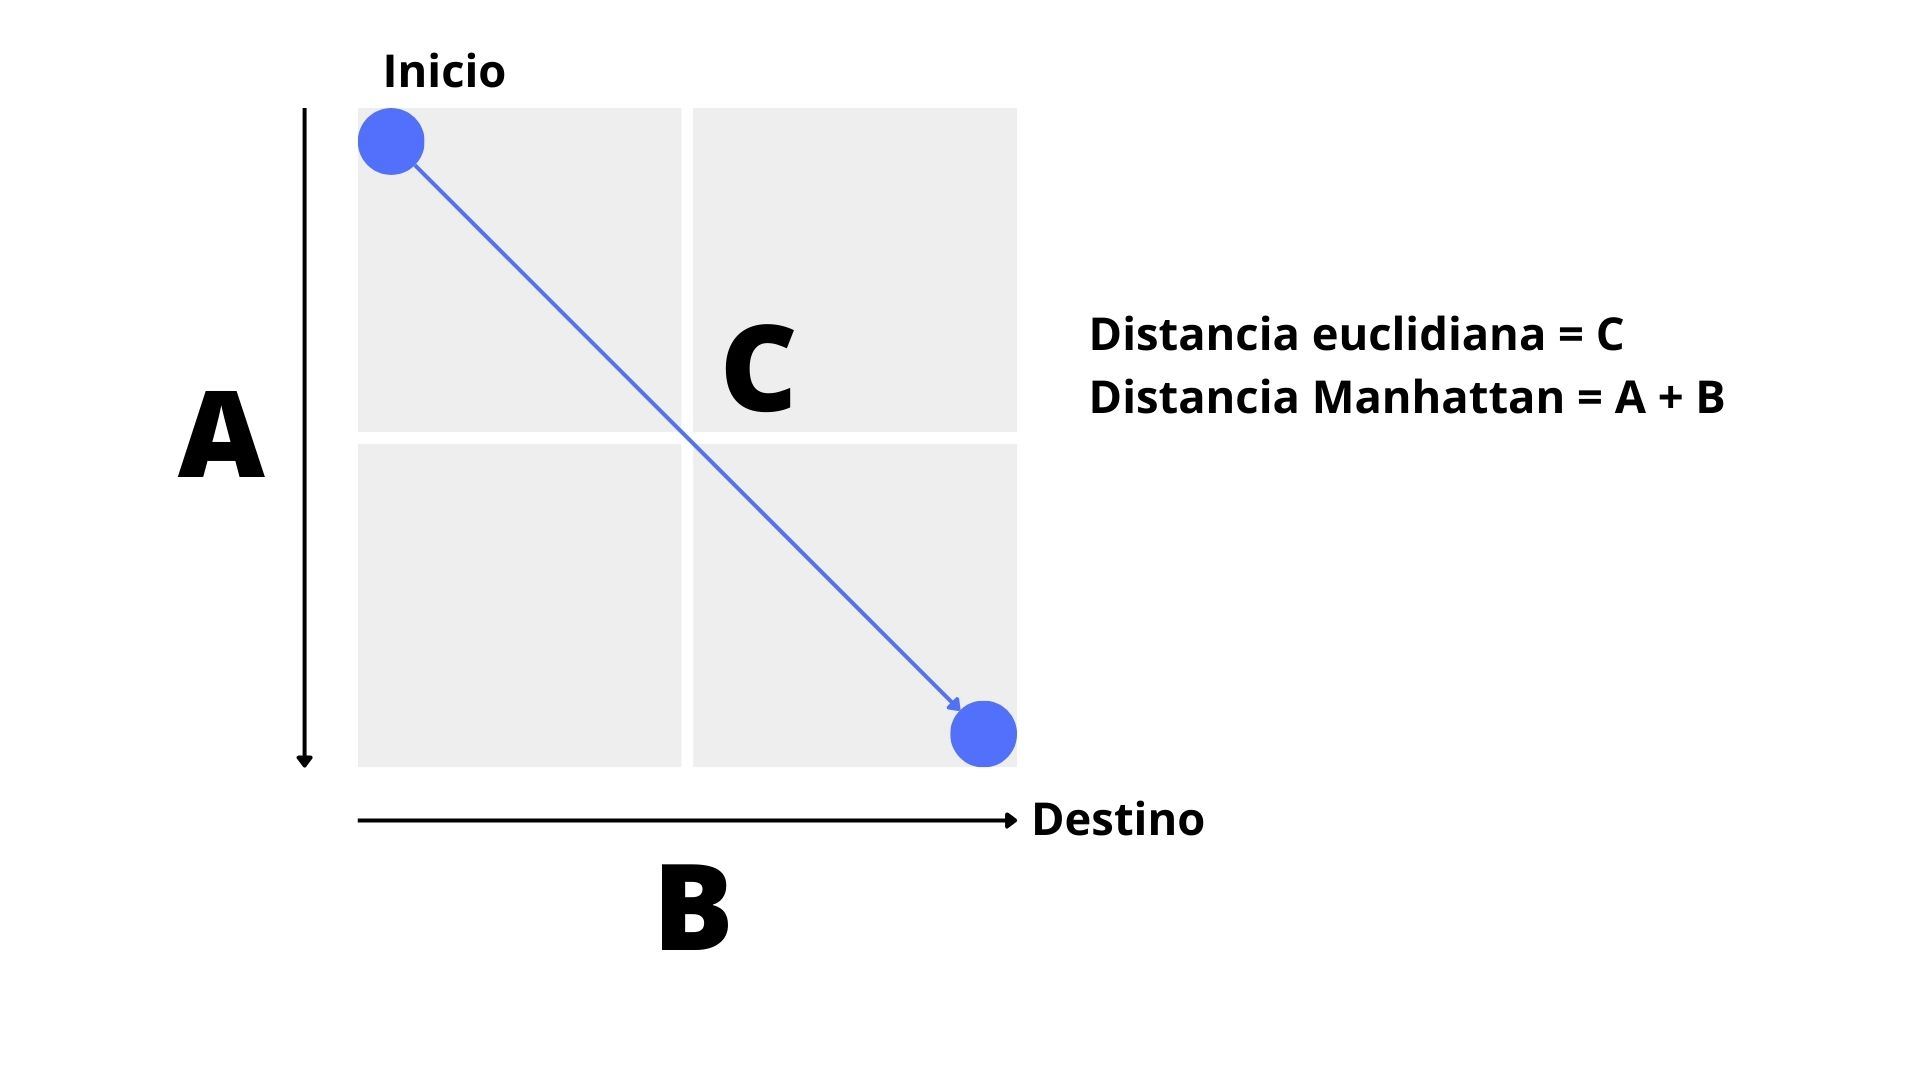

**Minkowski**: es una generalizaci√≥n de las distancias Euclidiana y Manhattan. Constituye una forma de calcular distancias con base en las diferencias absolutas al orden de la m√©trica  p  de Minkowski . Aunque se define para cualquier  p>0 , pocas veces se usa para valores distintos de 1, 2 y  ‚àû  (infinito). La distancia de Minkowski es la misma que se obtiene con Manhattan cuando  p=1  y la misma que la euclidiana cuando  p=2

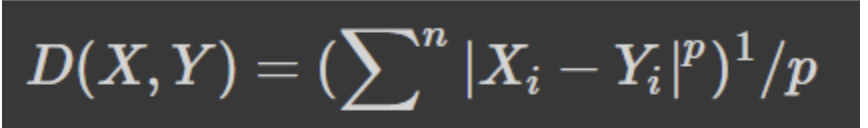


Ahora, se continuar√° con el an√°lisis del dendrograma para descubrir c√≥mo puede indicarse la cantidad de grupos en un conjunto de datos.

Encontrar un n√∫mero interesante de cl√∫steres en un dendrograma es lo mismo que encontrar el espacio horizontal m√°s grande que no tiene l√≠neas verticales (el espacio con las l√≠neas verticales m√°s largas). Esto significa que existe m√°s separaci√≥n entre los grupos.

Para hacer esto, se dibuja una l√≠nea horizontal por esa distancia m√°s larga.


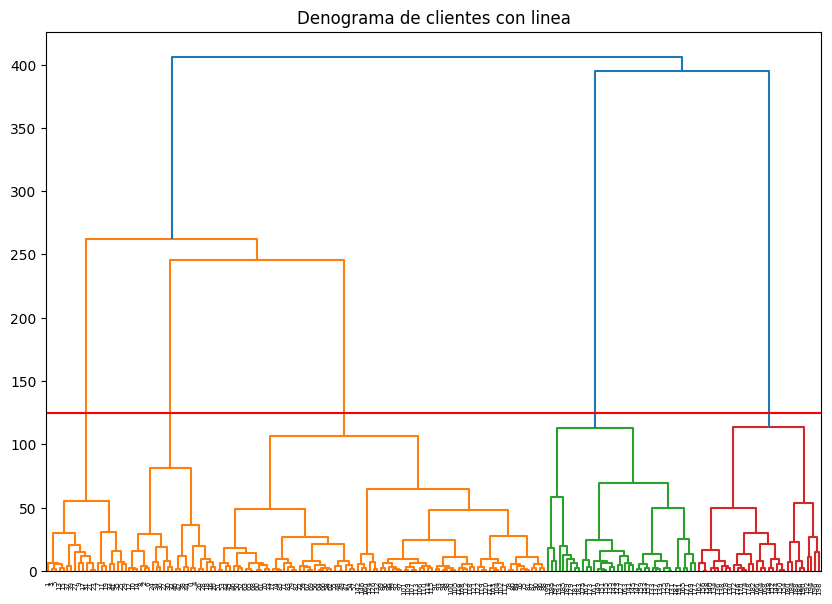

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Denograma de clientes con linea")
clusters = shc.linkage(selected_data,
            method='ward',
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 125, color = 'r', linestyle = '-')


Despu√©s de ubicar la l√≠nea horizontal, se cuenta el n√∫mero de veces que cruz√≥ las l√≠neas verticales; en este ejemplo, son 5 veces. Entonces, 5 parece una buena indicaci√≥n de la cantidad de grupos que tienen la mayor distancia entre ellos.

### Implementaci√≥n de una agrupaci√≥n jer√°rquica aglomerativa

Hasta ahora, se ha calculado la cantidad sugerida de grupos para el conjunto de datos que corrobora el an√°lisis inicial y el an√°lisis PCA. En este punto, se puede crear un modelo de agrupamiento jer√°rquico aglomerativo propio utilizando AgglomerativeClustering y encontrar las etiquetas de los puntos de los datos de marketing con labels_:

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

¬øQu√© significan estas etiquetas? Aqu√≠, cada punto de datos est√° etiquetado como un grupo del 0 al 4 graficados:


Text(0.5, 1.0, 'Data de clientes etiquetada')

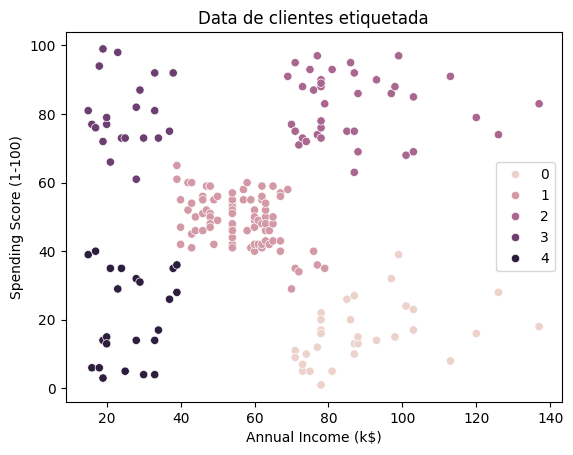

In [ ]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                data=selected_data,
                hue=data_labels).set_title('Data de clientes etiquetada')


Estos son los datos agrupados finales. Puedes notar los puntos de datos codificados por colores en forma de cinco grupos.

Los puntos de datos en la parte inferior derecha (etiqueta: 0) pertenecen a los clientes con salarios altos pero gastos bajos. Estos son quienes gastan su dinero con cuidado.

De manera similar, los clientes en la parte superior derecha (etiqueta: 2) son aquellos con salarios altos y gastos elevados. Estos son el tipo de clientes a quienes se dirigen las empresas.

Los clientes en el medio (etiqueta: 1) son aquellos que tienen ingresos y gastos promedio. El mayor n√∫mero de clientes pertenecen a esta categor√≠a. Las empresas tambi√©n pueden dirigirse a estos clientes, dado que se encuentran en grandes cantidades.

Los clientes en la parte inferior izquierda (etiqueta: 4) son aquellos con salarios bajos y gastos bajos, que podr√≠an atraerse ofreciendo promociones.

Por √∫ltimo, los clientes en la esquina superior izquierda (etiqueta: 3) son quienes tienen ingresos altos y gastos bajos y constituyen el grupo hacia donde el marketing se dirige idealmente.

Ahora que sabemos el m√©todo de agrupaci√≥n, para que nos sirve y c√≥mo aplicarlo, vamos a otro m√©todo de clustering que te ser√° un tanto familiar.

### 5.1.1 K-means

¬øRecuerdas la clasificaci√≥n con el m√©todo k-vecinos m√°s cercanos (en ingl√©s, k-nearest neighbours o KNN)? Ese mismo principio aplica en la clusterizaci√≥n, solo que aqu√≠ no hay etiquetas, por ende, se trata de un m√©todo no supervisado.

Como recordatorio, una "etiqueta" considera entre los  k  vecinos m√°s cercanos cu√°l se ha repetido m√°s veces, mediante la f√≥rmula  k‚ààN .

K-means es un algoritmo de clustering (agrupamiento) que tiene como objetivo particionar un conjunto de n observaciones en k clusters en los que cada observaci√≥n pertenece al cluster con la media m√°s cercana. Es uno de los m√©todos de clustering m√°s simples y populares en el aprendizaje no supervisado.

El algoritmo de K-means minimiza la suma de las distancias cuadradas entre los puntos y el centroide de su cluster asignado. Matem√°ticamente, el objetivo es minimizar la funci√≥n de coste, conocida como la inercia o la suma de cuadrados dentro del cluster (WCSS), definida como:

Para realizar un proceso de agrupaci√≥n por K-means es importante tener en consideraci√≥n los siguientes pasos:

1. **Inicializaci√≥n**: Seleccionar k puntos al azar del conjunto de datos como los centroides iniciales.
2. **Asignaci√≥n de Cluster**: Asignar cada punto al centroide m√°s cercano, formando k clusters. Esto se hace minimizando la distancia entre el punto y los centroides.
3. **Actualizaci√≥n de Centroides**: Calcular los nuevos centroides como el centro (media) de todos los puntos asignados a cada cluster.
4. **Iteraci√≥n**: Repetir los pasos 2 y 3 hasta que los centroides no cambien entre iteraciones sucesivas, o el cambio es menor que un umbral predefinido, lo que indica que el algoritmo ha convergido.

Para usar este modelo se necesita la funci√≥n KMeans, la cual se obtiene del sklearn.cluster.

Esta funci√≥n solicita varios par√°metros, algunos de ellos son los siguientes:

n_clusters: aqu√≠ se indica cu√°ntos clusters se desean. Si se omite este par√°metro, se tomar√° el n√∫mero 8 como valor por defecto.
init: es el m√©todo de inicio para la aplicaci√≥n del modelo. Aqu√≠, k-means++ genera los centroides inciales con base en los datos estad√≠sticos de entrenamiento, mientras que random iniciar√° con centroides completamente aleatorios. Por ello, se recomienda el uso de k-means++.
max_iter: es el n√∫mero m√°ximo de iteraciones por cada elemento.
n_init: representa el n√∫mero de veces que se ejecutar√° el algoritmo k-means++ con centroides distintos.

Si quieres ver los dem√°s par√°metros, puedes visitar la p√°gina [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

Preparemos otro ejemplo:

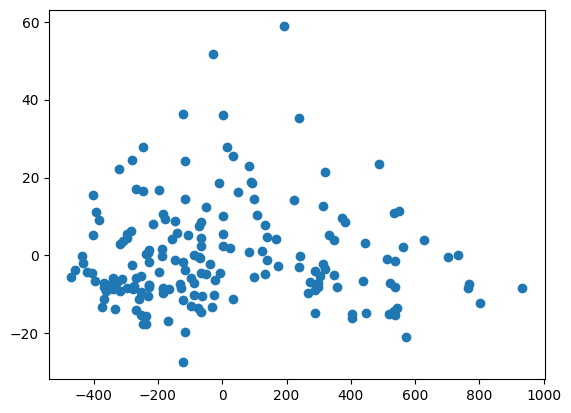

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/SanketP1995/Clustering-on-Wine-Dataset/main/wine-clustering.csv')
df.head(5)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df1 = pca.fit_transform(df)


df1_feature1 = df1[:,0]
df1_feature2 = df1[:,1]
plt.scatter(df1_feature1, df1_feature2)
plt.show()


Ahora veamos como lo agrupamos con KMeans

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df1)


El modelo entrenado recibe el nombre de y_means para diferenciarlo del resto. Recuerda que el nombre de un objeto o variable puede modificarse para mayor facilidad, por ello, se sugiere un nombre sencillo de recordar o, en su defecto, hacer comentarios con las almohadillas (#). Esto facilitar√° la lectura de tu c√≥digo para futuras revisiones.

Despu√©s de entrenar, puedes ver los valores que resulten, ya sea mediante una indicaci√≥n directa del objeto en Google Colab, en un Notebook o usando print.


In [ ]:
y_kmeans

array([3, 3, 1, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 2,
       3, 3, 2, 2, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2,
       3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 3, 0, 0, 3, 3, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 3, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

Que es la asociaci√≥n de los registros a cada uno de los clusters

Tambi√©n es posible apreciar cu√°ntos resultados se generaron por cada cluster.

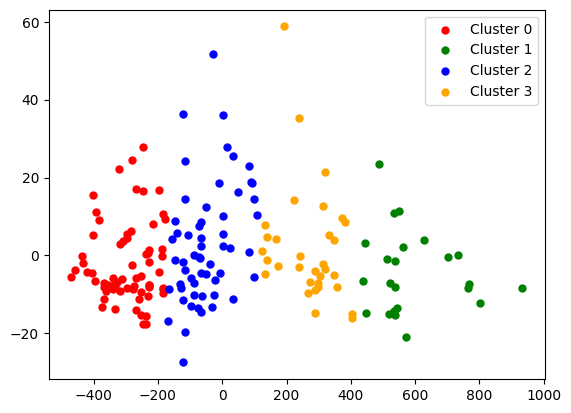

In [ ]:
np.unique(y_kmeans, return_counts= True)

plt.scatter(df1[y_kmeans == 0, 0], df1[y_kmeans == 0, 1], s = 100, marker= '.', c = "red", label = "Cluster 0")
plt.scatter(df1[y_kmeans == 1, 0], df1[y_kmeans == 1, 1], s = 100, marker= '.', c = "green", label = "Cluster 1")
plt.scatter(df1[y_kmeans == 2, 0], df1[y_kmeans == 2, 1], s = 100, marker= '.', c = "blue", label = "Cluster 2")
plt.scatter(df1[y_kmeans == 3, 0], df1[y_kmeans == 3, 1], s = 100, marker= '.', c = "orange", label = "Cluster 3")
plt.legend()
plt.show()

Como se mencion√≥ anteriormente, el algoritmo K-means minimiza la suma de las distancias cuadradas entre los puntos y el centroide de su cluster asignado. Matem√°ticamente, el objetivo es minimizar la funci√≥n de coste, conocida como la inercia o la suma de cuadrados dentro del cluster (WCSS), definida como:

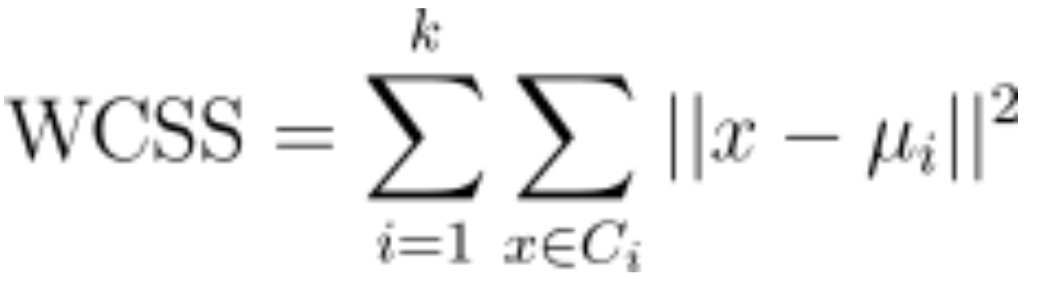

Donde:

- k es el n√∫mero de clusters.
- Ci es el conjunto de todos los puntos asignados al cluster i
- x es un punto de datos dentro de Ci
- Œºi es el centroide del cluster i, que es el promedio de todos los puntos en Ci
‚Äã- ‚à£‚à£x‚àíŒºi‚à£‚à£2 es la distancia euclidiana cuadrada entre el punto x y el centroide Œºi

Para realizar un entrenamiento bajo este m√©todo es importante considerar lo siguiente:

1. **Elecci√≥n de k**: La elecci√≥n del n√∫mero √≥ptimo de clusters, k, no es trivial y es cr√≠tica para el rendimiento del algoritmo. M√©todos como el "m√©todo del codo" y el "m√©todo del silueta" se utilizan com√∫nmente para estimar el valor de k.
2. **Inicializaci√≥n**: La elecci√≥n de los centroides iniciales puede afectar significativamente los resultados finales. K-means++ es una t√©cnica que busca mejorar la selecci√≥n inicial de centroides para aumentar la probabilidad de una soluci√≥n √≥ptima.
3. **Limitaciones**: K-means asume que los clusters son convexos y isotr√≥picos, lo cual puede no ser adecuado para algunos conjuntos de datos. Puede ser sensible a los valores at√≠picos y puede resultar en una convergencia a m√≠nimos locales.

La optimizaci√≥n de los modelos de Clustering es todo un mundo que usa diversos m√©todos y m√©tricas para saber si estamos haciendo bien el trabajo o no. Los cuales vamos a repasar a continuaci√≥n

### k-fold Cross Validation

Esto ya lo vimos en un m√≥dulo anterior pero no est√° dem√°s repasar.

La validaci√≥n cruzada es un m√©todo estad√≠stico usado para estimar la habilidad de los modelos de aprendizaje autom√°tico.

Se usa com√∫nmente en el aprendizaje autom√°tico aplicado para comparar y seleccionar un modelo para un problema de modelado predictivo dado, porque es f√°cil de entender y de implementar, y da como resultado estimaciones de habilidades que generalmente tienen un sesgo menor que otros m√©todos.

La validaci√≥n cruzada es un procedimiento de remuestreo que se utiliza para evaluar modelos de aprendizaje autom√°tico en una muestra de datos limitada.

El procedimiento tiene un solo par√°metro, llamado  k , que se refiere a la cantidad de grupos en los que se dividir√° una muestra de datos. Como tal, el procedimiento a menudo se denomina validaci√≥n cruzada de k-fold. Cuando se elige un valor espec√≠fico para  k , en lugar de  k  en la referencia al modelo, puede usarse  k=10 , convirti√©ndose en una validaci√≥n cruzada de 10 veces.


El procedimiento general es el siguiente:

1. Mezclar aleatoriamente el dataset.
2. Dividir el dataset en k grupos.
3. Para cada grupo √∫nico:
  - Tomar al grupo como un dataset de prueba o reserva.
  - Tomar los grupos restantes como un dataset de entrenamiento.
  - Ajustar un modelo en el conjunto de entrenamiento y evaluarlo en el conjunto de prueba.
  - Conservar la puntuaci√≥n de la evaluaci√≥n y descartar el modelo.
4. Resumir la habilidad del modelo usando la muestra de puntajes de evaluaci√≥n del modelo.

El valor  k  debe elegirse cuidadosamente para la muestra de datos.

Un valor de  k  mal elegido puede dar lugar a una idea err√≥nea de la habilidad del modelo, como una puntuaci√≥n con una varianza alta (que puede cambiar mucho, seg√∫n los datos utilizados para ajustar el modelo) o un sesgo alto (como una sobreestimaci√≥n de la habilidad del modelo).

Tres t√°cticas comunes para elegir un valor para k son las siguientes:

**Representativo**: el valor de  k  se elige de modo que cada grupo de muestras de datos de prueba/entrenamiento sea lo suficientemente grande como para ser estad√≠sticamente representativo del dataset m√°s amplio.

**k=10**: el valor de  k  se fija en  10 , un valor que se ha encontrado por medio de la experimentaci√≥n, que generalmente da como resultado una estimaci√≥n de habilidad del modelo con un sesgo bajo y una varianza controlada.

**k=n**: el valor de  k  se fija en  n , donde  n  es el tama√±o del dataset para dar a cada muestra de prueba la oportunidad de usarse en el dataset reservado. Este enfoque se denomina validaci√≥n cruzada de dejar uno afuera.

Imagina que tenemos esta muestra de datos:


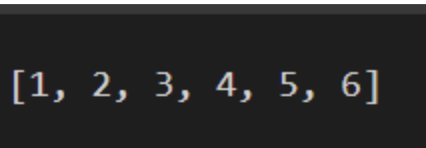


El primer paso es elegir un valor para  k , a fin de determinar el n√∫mero de pliegues utilizados para dividir los datos. Aqu√≠ usaremos un valor de  k=3 , lo cual significa que mezclaremos los datos y luego los dividiremos en 3 grupos. Como tenemos 6 observaciones, cada grupo tendr√° el mismo n√∫mero de 2 observaciones.

Quedar√≠a algo as√≠:

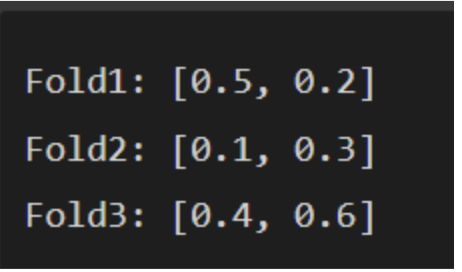

Luego, podemos hacer uso de la muestra; por ejemplo, para evaluar la habilidad de un algoritmo de aprendizaje autom√°tico.

Se entrenan y eval√∫an tres modelos, y cada pliegue tiene la oportunidad de ser el conjunto de prueba extendido.

Por ejemplo:
- Modelo 1 : Entrenado en Fold1 + Fold2, probado en Fold3
- Modelo 2 : Entrenado en Fold2 + Fold3, probado en Fold1
- Modelo 3 : Entrenado en Fold1 + Fold3, robado en Fold2
- Luego de evaluarse, los modelos se descarta, ya que han cumplido su prop√≥sito.

Los puntajes de habilidad se recopilan para cada modelo y se resumen para su uso.

No tenemos que implementar manualmente la validaci√≥n cruzada k-fold. La biblioteca scikit-learn proporciona una implementaci√≥n que dividir√° una muestra de datos determinada.

Se puede usar la clase scikit-learn KFold(). Toma como argumentos el n√∫mero de divisiones, si se mezcla o no la muestra, y la semilla para el generador de n√∫meros pseudoaleatorios utilizado antes de la mezcla.

Por ejemplo, podemos crear una instancia que divida un conjunto de datos en  3  pliegues, los baraje antes de la divisi√≥n y use un valor de 1 para el generador de n√∫meros pseudoaleatorios.


In [ ]:
# Importamos las bibliotecas
from numpy import array
from sklearn.model_selection import KFold

# Generamos nuestra muestra de datos
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

# Preparamos la validaci√≥n cruzada
kfold = KFold(n_splits=3, random_state=1, shuffle=True)

# Enumeramos los dobleces
for train, test in kfold.split(data):
	print('train: %s, test: %s' % (data[train], data[test]))

train: [0.1 0.4 0.5 0.6], test: [0.2 0.3]
train: [0.2 0.3 0.4 0.6], test: [0.1 0.5]
train: [0.1 0.2 0.3 0.5], test: [0.4 0.6]


La implementaci√≥n de validaci√≥n cruzada de k-fold en scikit-learn se proporciona como una operaci√≥n de componente en m√©todos m√°s amplios, como hiperpar√°metros de modelo de b√∫squeda de cuadr√≠cula y puntuaci√≥n de un modelo en un dataset.

Sin embargo, la clase k-fold se puede usar directamente para dividir un conjunto de datos antes del modelado, de modo que todos los modelos usan las mismas divisiones de datos. Esto es especialmente √∫til si se est√° trabajando con muestras de datos muy grandes. El uso de las mismas divisiones entre algoritmos puede tener beneficios para las pruebas estad√≠sticas que desees realizar en los datos m√°s adelante.

Hay una serie de variaciones en el procedimiento de validaci√≥n cruzada de k-fold.

Divisi√≥n de entrenamiento/prueba: llevado a un extremo,  k  se puede establecer en 2 (no en 1), de modo que se cree una √∫nica divisi√≥n de entrenamiento/prueba para evaluar el modelo.

- **LOOCV**: llevado a otro extremo,  k  puede establecerse en el n√∫mero total de observaciones en el dataset, de modo que cada observaci√≥n tenga la oportunidad de ser retenida del conjunto de datos. Esto se llama validaci√≥n cruzada de Leave One Out o LOOCV, para abreviar.
- **Estratificado**: la divisi√≥n de datos en pliegues puede regirse por criterios como garantizar que cada pliegue tenga la misma proporci√≥n de observaciones, con un valor categ√≥rico dado, como el valor de resultado de clase. Esto se llama validaci√≥n cruzada estratificada.
- **Repetido**: aqu√≠ es donde el procedimiento de validaci√≥n cruzada de  k  veces se repite  n  veces, donde lo m√°s importante: la muestra de datos, se baraja antes de cada repetici√≥n, lo que da como resultado una divisi√≥n diferente de la muestra.
- **Anidado**: aqu√≠ se realiza la validaci√≥n cruzada de k-fold dentro de cada pliegue de validaci√≥n cruzada, a menudo para realizar ajustes de hiperpar√°metros durante la evaluaci√≥n del modelo. Esto se denomina validaci√≥n cruzada anidada o validaci√≥n cruzada doble.

### An√°lisis de sensibilidad para k

El par√°metro de configuraci√≥n clave para la validaci√≥n cruzada de k pliegues es  k , que define el n√∫mero de pliegues en los que se divide un conjunto de datos determinado.

Los valores comunes son  k=3 ,  k=5  y  k=10 . Por mucho, el valor m√°s utilizado en el aprendizaje autom√°tico aplicado para evaluar modelos es  k=10 .

¬øC√≥mo sabemos qu√© valor de k usar al evaluar modelos en nuestro propio dataset?

Podemos elegir  k=10 , pero ¬øc√≥mo sabemos que esto tiene sentido para nuestro dataset?

Un enfoque para responder a esta pregunta es realizar un an√°lisis de sensibilidad para diferentes valores de  k ; es decir, evaluar el rendimiento del mismo modelo en el mismo conjunto de datos con diferentes valores de  k  y ver c√≥mo se comparan.

La expectativa es que los valores bajos de  k  dar√°n como resultado una estimaci√≥n ruidosa del rendimiento del modelo, y los valores grandes de  k  dar√°n como resultado una estimaci√≥n menos ruidosa del rendimiento del modelo.

¬øPero ruidoso en comparaci√≥n con qu√©?

No conocemos el rendimiento real del modelo cuando hacemos predicciones sobre datos nuevos/no vistos, ya que no tenemos acceso a datos nuevos/no vistos. Si lo hici√©ramos, har√≠amos uso de uno en la evaluaci√≥n del modelo.

Sin embargo, podemos elegir una condici√≥n de prueba que represente una estimaci√≥n "ideal" o "lo mejor que podamos lograr" del rendimiento del modelo.

Exploraremos c√≥mo implementar un an√°lisis de sensibilidad de la validaci√≥n cruzada k-fold.

Primero definamos una funci√≥n para crear el dataset. Tambi√©n puedes usar el tuyo.


In [ ]:
# Importamos las bibliotecas
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# Funci√≥n que crea el dataset
def get_dataset(n_samples=100):
	X, y = make_classification(n_samples=n_samples, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y

A continuaci√≥n podemos definir una funci√≥n para evaluar el modelo en el dataset, dada una condici√≥n de prueba. La condici√≥n de prueba podr√≠a ser una instancia de k-fold configurada con un valor  k  dado, o podr√≠a ser una instancia de LeaveOneOut que represente nuestra condici√≥n de prueba ideal.


In [ ]:
# Devuelve el modelo a evaluar
def get_model():
	model = LogisticRegression()
	return model

La funci√≥n siguiente devuelve la precisi√≥n de la clasificaci√≥n media, as√≠ como la precisi√≥n m√≠nima y m√°xima de los pliegues. Podemos usar la m√≠nima y la m√°xima para resumir la distribuci√≥n de puntajes.


In [ ]:
# Devuelve las puntuaciones de evaluaci√≥n del modelo
def evaluate_model(cv):
		# Obtenemos el dataset
		X, y = get_dataset()
		# Obtenemos el modelo
		model = get_model()
		# Evaluamos el modelo con cross validation
		scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
		# Devolvemos las puntuaciones
		return mean(scores), scores.min(), scores.max()


A continuaci√≥n podemos calcular el rendimiento del modelo utilizando el procedimiento LOOCV.
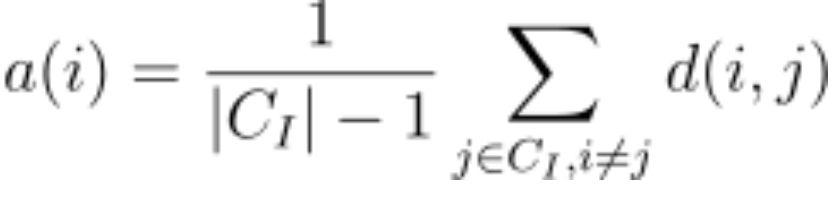

In [ ]:
# Calcular las condiciones ideales de test
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)


Ideal: 0.840


D√°ndonos como resultado ideal aproximado: 0.840

Entonces podemos definir los valores de k para evaluar. En este caso, probaremos valores entre 2 y 30.


In [ ]:
# Definimos los dobleces a probar
folds = range(2,31)

Luego podemos evaluar cada valor y, a su vez, almacenar los resultados a medida que avanzamos.

In [ ]:
# Registramos la media y el m√≠nimo/m√°ximo de cada conjunto de resultados
means, mins, maxs = list(),list(),list()
# Evaluamos cada valor k
for k in folds:
	# Definimos las condiciones del test
	cv = KFold(n_splits=k, shuffle=True, random_state=1)
	# Evaluamos el valor de k
	k_mean, k_min, k_max = evaluate_model(cv)
	# Imprimimos el rendimiento
	print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
	# Guardamos la media de la precisi√≥n
	means.append(k_mean)
  # Guardamos m√≠nimo y m√°ximo en relaci√≥n con la media
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)



> folds=2, accuracy=0.740 (0.700,0.780)
> folds=3, accuracy=0.749 (0.697,0.824)
> folds=4, accuracy=0.790 (0.640,0.920)
> folds=5, accuracy=0.810 (0.600,0.950)
> folds=6, accuracy=0.820 (0.688,0.941)
> folds=7, accuracy=0.799 (0.571,1.000)
> folds=8, accuracy=0.811 (0.385,0.923)
> folds=9, accuracy=0.829 (0.636,1.000)
> folds=10, accuracy=0.850 (0.600,1.000)
> folds=11, accuracy=0.829 (0.667,1.000)
> folds=12, accuracy=0.785 (0.250,1.000)
> folds=13, accuracy=0.839 (0.571,1.000)
> folds=14, accuracy=0.807 (0.429,1.000)
> folds=15, accuracy=0.821 (0.571,1.000)
> folds=16, accuracy=0.827 (0.500,1.000)
> folds=17, accuracy=0.816 (0.600,1.000)
> folds=18, accuracy=0.831 (0.600,1.000)
> folds=19, accuracy=0.826 (0.600,1.000)
> folds=20, accuracy=0.830 (0.600,1.000)
> folds=21, accuracy=0.814 (0.500,1.000)
> folds=22, accuracy=0.820 (0.500,1.000)
> folds=23, accuracy=0.802 (0.250,1.000)
> folds=24, accuracy=0.804 (0.250,1.000)
> folds=25, accuracy=0.810 (0.250,1.000)
> folds=26, accuracy=0.8

En este caso, podemos ver que el resultado LOOCV fue de alrededor de 84 %, valor ligeramente inferior al resultado k=10 del 85 por ciento.

Finalmente, podemos graficar los resultados para su interpretaci√≥n.


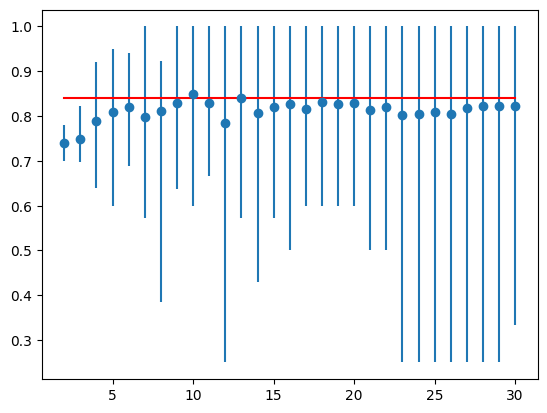

In [ ]:
# Diagrama de l√≠nea de k valores medios con barras de error m√≠nimo/m√°ximo
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# Graficamos el caso ideal en un color diferente
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# Mostramos la gr√°fica
pyplot.show()


Los resultados sugieren que para este modelo, en este dataset, la mayor√≠a de los valores de  k  subestiman el rendimiento del modelo en comparaci√≥n con el caso ideal. Los resultados sugieren que quiz√°  k=10  solo sea un poco optimista y  k=13  podr√≠a ser una estimaci√≥n m√°s precisa.

### Evaluaci√≥n de los modelos por medio de m√©tricas

La evaluaci√≥n del modelo siempre es un paso importante en una canalizaci√≥n de aprendizaje autom√°tico, porque nos dice qu√© tan bueno es el modelo para describir los datos.

Cuando hablamos de evaluaciones de modelos, nos referimos m√°s a menudo a los modelos de aprendizaje supervisado, en los que las etiquetas verdaderas de los datos est√°n disponibles. La m√©trica de rendimiento en el aprendizaje supervisado se puede desarrollar en funci√≥n del desacuerdo entre las etiquetas verdaderas y las previstas del modelo.

Ten en cuenta que cuando hablamos de si un agrupamiento es bueno o malo, el agrupamiento en realidad se refiere a la asignaci√≥n entre el punto de datos y la etiqueta del grupo. Para el mismo conjunto de datos, el agrupamiento mediante un m√©todo podr√≠a ser bueno, pero el agrupamiento por otro m√©todo podr√≠a ser malo. Todas las definiciones de distancia anteriores deben basarse en un conjunto de datos ya agrupado (etiquetado).

### Coeficiente de silueta

Como una de las m√©tricas de evaluaci√≥n de agrupamiento m√°s utilizadas, el coeficiente de silhouette resume la comparaci√≥n de la distancia intra- o interagrupamiento en una puntuaci√≥n de entre -1 y 1.

Un valor cercano a 1 indica un resultado de agrupaci√≥n excelente, en la que las distancias entre grupos son mucho mayores que las distancias dentro de los grupos; mientras que un valor cercano a -1 significa una asignaci√≥n de cl√∫ster totalmente incorrecta, en la que las distancias entre cl√∫steres ni siquiera son comparables con las distancias dentro de los cl√∫steres.

En primer lugar, necesitamos saber c√≥mo calcular las distancias medias intra o inter-cl√∫ster para un punto espec√≠fico.

En cuanto a la distancia dentro del grupo, para cualquier punto de datos  i  que est√© dentro del grupo  C , a se define como la distancia media entre  i  y todos los dem√°s puntos de datos dentro de  C .

donde  |CI|  es el n√∫mero de puntos que pertenecen al grupo  i  , y  d(i,j)  es la distancia entre los puntos de datos  i  y  j  en el grupo  CI  .

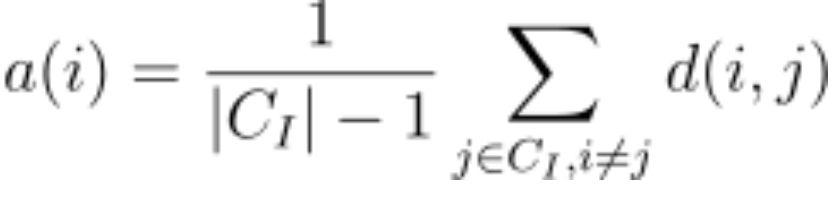


Entonces, para cualquier punto i dado, una puntuaci√≥n peque√±a  a(i)  indica una buena asignaci√≥n de agrupaci√≥n para el punto  i  porque est√° cerca de los puntos dentro del mismo grupo. Por el contrario, una puntuaci√≥n alta a  (i)  indica una mala agrupaci√≥n para el punto  i  porque est√° lejos de los puntos de su propia agrupaci√≥n.

En cuanto a la distancia entre grupos, para cualquier punto de datos  i , que est√© dentro del grupo  C ,  b  se define como la distancia media m√°s peque√±a de  i  a todos los puntos en cualquier otro grupo, del cual  i  no es miembro. En otras palabras,  b  es la distancia media entre  i  y todos los puntos de su grupo vecino m√°s cercano.

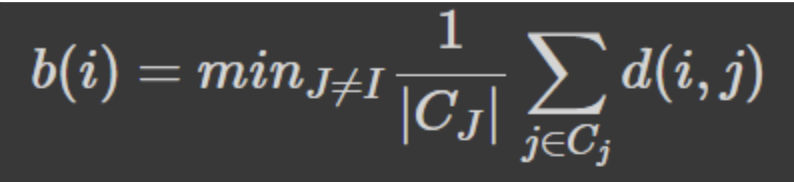

Despu√©s de obtener las distancias medias tanto dentro del grupo como entre grupos para cada punto en el conjunto de datos, la puntuaci√≥n de silueta se define como tal:

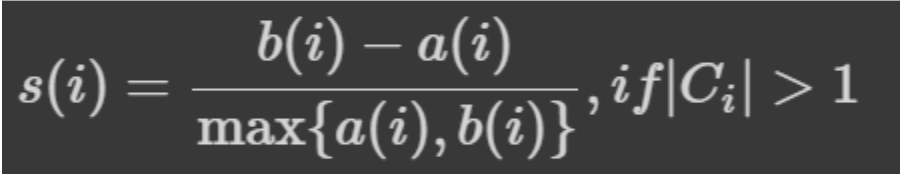


La mayor desventaja de la puntuaci√≥n de silueta es que es costosa. El tiempo de ejecuci√≥n muy largo en un conjunto de datos relativamente grande lo hace menos √∫til en aplicaciones del mundo real.

### √çndice de Calinski-Harabasz

El √≠ndice de Calinski-Harabasz (tambi√©n conocido como criterio de la relaci√≥n de varianza) se define como una relaci√≥n entre la suma de la distancia al cuadrado entre grupos y la suma de la distancia al cuadrado entre grupos para todos los grupos. La suma de la distancia al cuadrado se corrige mediante el grado de libertad.

Aqu√≠, el intracl√∫ster se estima en funci√≥n de las distancias desde los puntos de datos en un cl√∫ster hasta su propio centroide de cl√∫ster, y el intercl√∫ster se basa en la distancia de los centroides del cl√∫ster desde el centroide global.

El √≠ndice de Calinski-Harabasz (CH) para  K  grupos en un conjunto de datos  D  se define como

donde  di  es el vector de caracter√≠sticas del punto de datos  i ;  nk  es el tama√±o del grupo k-√©simo;  ck  es el vector de caracter√≠sticas del centroide del grupo k-√©simo;  c  es el vector de caracter√≠sticas del centroide global de todo el conjunto de datos, y  N  es el n√∫mero total de puntos de datos.

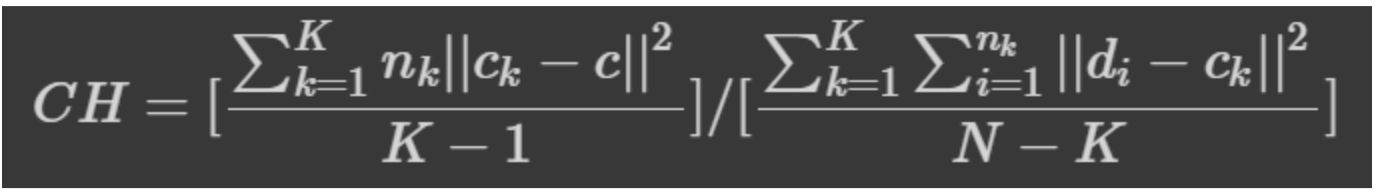


En la ecuaci√≥n podemos ver que cuanto mayor es CH mejor se separan los grupos entre s√≠, y no hay un l√≠mite superior para CH, como los de la puntuaci√≥n de silueta.

Pensemos en un resultado de agrupamiento ideal basado en el √≠ndice CH. Por ejemplo, que hay varios agrupamientos ‚Äúglobulares‚Äù, donde los centroides de los agrupamientos est√°n alejados entre s√≠ y los miembros del agrupamiento est√°n cerca de sus respectivos centroides.

Sin embargo, si los conglomerados no tienen tales formas, las distancias basadas en centroides no ser√°n tan informativas para determinar la calidad del algoritmo del conglomerado. Por lo tanto, no se recomienda el uso del √≠ndice CH para los m√©todos basados ‚Äã‚Äãen la densidad, como el agrupamiento de desplazamiento medio, DBSCAN, OPTICS, etc√©tera.


### √çndice Davies-Bouldin

El √≠ndice de Davies-Bouldin es similar al √≠ndice  CH , pero el c√°lculo de la relaci√≥n de distancia inter- o intracl√∫ster es inverso al del √≠ndice  CH . En el c√°lculo del √≠ndice de Davies-Bouldin hay un concepto, el puntaje de similitud, que mide qu√© tan similares son dos grupos, que se define de la siguiente manera:

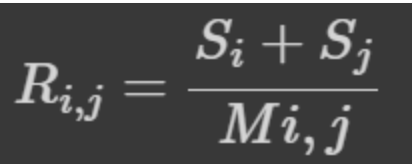


Donde  Rij  es el puntaje de similitud;  Si  y  Sj  son la distancia promedio de los puntos a los centroides dentro del cl√∫ster  i  y  j , respectivamente, y  Mij  es la distancia entre los centroides del conglomerado  i  y el conglomerado  j .

Podemos ver en la ecuaci√≥n que una puntuaci√≥n de similitud menor indica una mejor separaci√≥n de grupos, porque un numerador peque√±o significa que la distancia dentro de los grupos es peque√±a y un denominador grande significa que la distancia entre grupos es grande.

El √≠ndice de Davies-Bouldin se define como la puntuaci√≥n de similitud promedio de todos los cl√∫steres con su cl√∫ster vecino m√°s cercano,

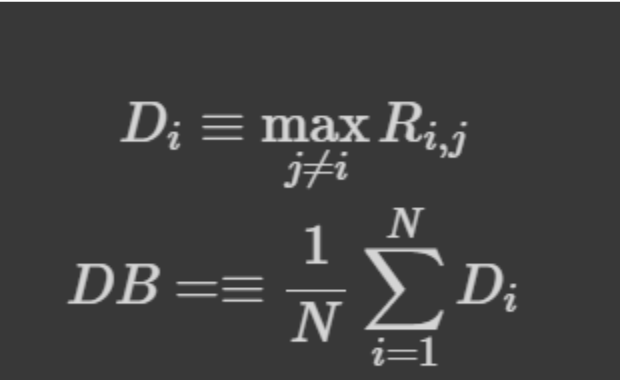

Donde  Di  es la puntuaci√≥n de similitud peor (mayor) del grupo  i  entre todos los dem√°s grupos, y el √≠ndice  DB  final es el  Di  promediado entre  N  grupos.

Podemos ver que cuanto m√°s peque√±o es el √≠ndice  DB , mejor es la separaci√≥n de grupos. Tiene una desventaja similar a la del √≠ndice  CH , que es malo para manejar m√©todos de agrupamiento sin una suposici√≥n de forma espec√≠fica (como el agrupamiento basado en la densidad). Pero tanto el √≠ndice  CH  como el  DB  son mucho m√°s r√°pidos que el c√°lculo de la puntuaci√≥n de silueta.

Gracias a scikit-learn, implementar est√°s m√©tricas es muy sencillo:
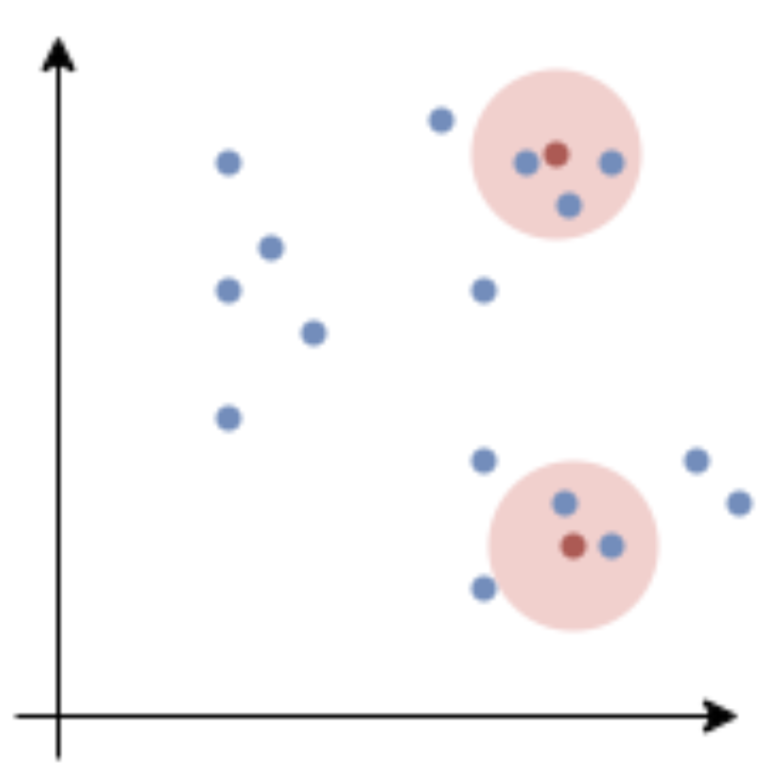

In [ ]:
# Importamos las bibliotecas
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics

# Cargamos un dataset de muestra y hacemos una clusterizaci√≥n por k-means en el
X, y = datasets.load_iris(return_X_y=True)
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans.labels_

# Generamos los scores
Silueta = metrics.silhouette_score(X, labels)

Calinski_Harabasz = metrics.calinski_harabasz_score(X, labels)
Davies_Bouldin = metrics.davies_bouldin_score(X, labels)

# Imprimimos los scores
print("Score Anal√≠sis de silueta: ", Silueta)
print("Score indice Calinski-Harabasz : ", Calinski_Harabasz)
print("Score indice Davies-Bouldin: ", Davies_Bouldin)


Score Anal√≠sis de silueta:  0.5528190123564095
Score indice Calinski-Harabasz :  561.62775662962
Score indice Davies-Bouldin:  0.6619715465007465


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Podemos decir que la agrupaci√≥n y separaci√≥n de nuestro modelo de clustering son buenas debido a:

- El an√°lisis de silueta tiende a 1; por ende, tenemos una buena agrupaci√≥n.
- El √≠ndice Calinski-Harabasz es alto: 516; por ende, los grupos se separan mejor entre s√≠.
- El √≠ndice Davies-Bouldin es bajo: de 0.6619...; es decir, tenemos una buena separaci√≥n entre grupos.

### M√©tricas de distancia en clustering

La m√©trica de distancia desempe√±a un papel crucial en la identificaci√≥n de estos puntos de datos similares y en la formaci√≥n de grupos respectivos. K-means utiliza la distancia euclidiana, como la m√©trica de distancia predeterminada para el clustering. Por lo tanto, es importante jugar con diferentes medidas de distancia para cualquier conjunto de datos.

Vamos a comenzar a comparar el rendimiento de nuestro modelo de clustering con las diferentes m√©tricas de distancia.


In [ ]:
# Esta l√≠nea instala lo que necesitamos
!pip install pyclustering

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.6/2.6 MB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=308c91cf407f872e259432b607bddad6a067ff2fe8aa4a22890c175cd509b428
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [ ]:
# Importamos bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder


Aqu√≠ usamos PyClustering para implementar el agrupamiento de k-means en dataset de iris usando distancias euclidianas, euclidianas al cuadrado, Manhattan, Chebyshev, canberra y chi-cuadrado. El rendimiento del agrupamiento con estas diferentes medidas de distancia se eval√∫a mediante una puntuaci√≥n de pureza (evaluaci√≥n b√°sica para el agrupamiento).

El dataset se puede encontrar aqu√≠: https://www.kaggle.com/datasets/uciml/iris

Primero leemos el dataset:


In [ ]:
df = pd.read_csv('/content/Iris.csv')
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Despu√©s, separamos las caracter√≠sticas de la etiqueta objetivo:

In [ ]:
X = df.iloc[:, 1:5].values
y = df.iloc[:, -1].values

Determinamos el n√∫mero √≥ptimo de grupos utilizando el m√©todo elbow o m√©todo del codo.

El n√∫mero √≥ptimo de grupos  k  se puede determinar utilizando el m√©todo del codo. A medida que aumenta el n√∫mero de conglomerados, el error de la suma de los cuadrados (SSE) dentro del conglomerado disminuye, porque los puntos de datos se acercan a su centro de conglomerado respectivo. Con el m√©todo del codo, el objetivo es encontrar  k , donde SSE disminuye m√°s r√°pidamente. Por lo tanto, en la figura se puede ver que el n√∫mero √≥ptimo de grupos es 3; esto es, lo mismo que el n√∫mero real de clases en el conjunto de datos.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

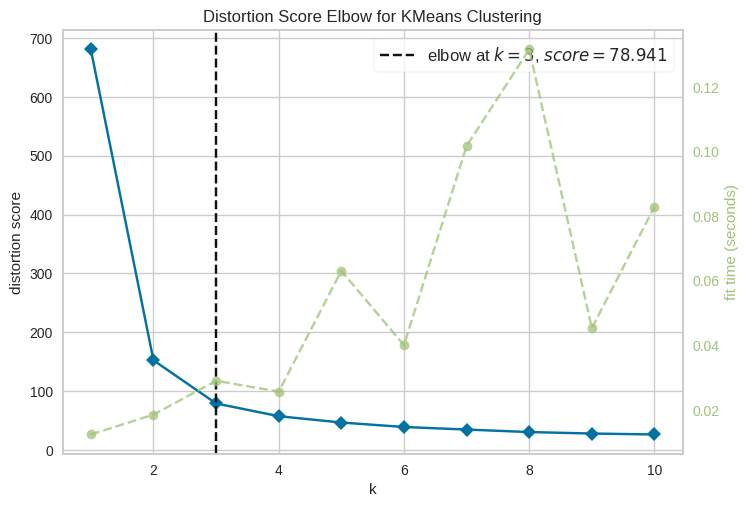

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Iniciamos el modelo y el visualizador
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(X) # Hacemos fit a los datos en el visualizador
visualizer.show() # Renderizamos la figura y la mostramos

Como puedes ver, k-means en sklearn no tiene una opci√≥n para cambiar la m√©trica de distanciam y, de forma predeterminada, usa la distancia euclidiana. Primero verifiquemos el rendimiento usando euclidiana y luego comparemos con otra distancia en la secci√≥n 6.

In [ ]:
# Instanciamos la clase k-means y ponemos el n√∫mero de cl√∫sters
km_model = KMeans(n_clusters=3, random_state=10)

# Llamamos al m√©todo fit con nuestra data
km = km_model.fit_predict(X)

# Obtenemos las coordenadas de los centroides o centros de los cl√∫sters
centroids = km_model.cluster_centers_

# etiquetamos cada cl√∫ster de datos
labels = km_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Despu√©s, visualizamos los cl√∫sters:

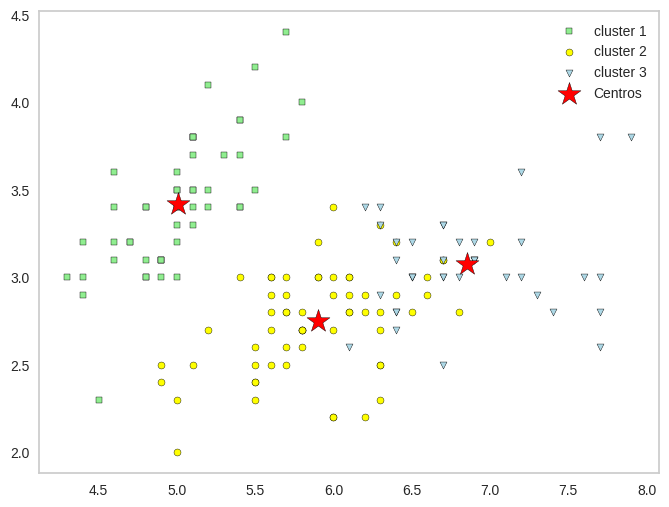

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    X[km == 0, 0], X[km == 0, 1],
    s=25, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[km == 1, 0], X[km == 1, 1],
    s=25, c='yellow',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[km == 2, 0], X[km == 2, 1],
    s=25, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# Visualizamos los centros de cl√∫sters
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='Centros'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()


Aqu√≠, la puntuaci√≥n de pureza se calcula mediante ground truth o external accessment. Dado que el conjunto de datos consta de una etiqueta de clase verdadera, la precisi√≥n de la etiqueta de cl√∫ster calculada con k-means se compara con la clase de etiqueta verdadera.

In [ ]:
def purity_score(y_true, y_pred):
    # Generamos la matriz de contingencia o matriz de confusi√≥n
    confusion_matrix = contingency_matrix(y_true, y_pred)
    # Regresamos la m√©trica de pureza
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

# Imprimimos la m√©trica de pureza
purity = purity_score(y, labels)
print(f"La pureza es de {round(purity*100, 2)}%")


La pureza es de 89.33%


Despu√©s, k-means se realiza utilizando la biblioteca de PyClustering para varias m√©tricas de distancia, como Manhattan, Chebyshev, euclidiana, etc√©tera.

La distancia de Minkowski es solo la generalizaci√≥n de la distancia euclidiana  p=2 ; Manhattan,  p=1 , y chebyshev,  p=Inf .

Aunque para PyClustering los centros iniciales se pueden inicializar usando el algoritmo  k++ , pero he iniciado aleatoriamente el centro inicial para comparar los resultados con sklearn k-means.

La pureza m√°s alta se logra utilizando chi-square como la m√©trica de distancia.


In [ ]:
# Definimos un diccionario con las m√©tricas de distancia
distance_measures = {'euclidiana': 0,
                     'euclideana cuadrada': 1,
                     'manhattan': 2,
                     'chebyshev': 3,
                     'canberra': 5,
                     'chi-square': 6
                     }

# Funci√≥n para calcular la puntuaci√≥n de pureza usando PyClustering para varias medidas de distancia
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(X, 3, random_state=5).initialize()
    # Instancia creada para la m√©trica de distancia respectiva
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # Hacemos un an√°lisis de clustering
    instanceKm.process()
    # Resultados del an√°lisis de clustering
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # Enumeramos el tipo de codificaci√≥n para indexar el etiquetado para obtener etiquetas
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # Usamos la funci√≥n de pureza previamente definida
    return purity_score(y, pyLabels)

# Imprimimos los resultados
for measure, value in distance_measures.items():
    print(f"La puntuaci√≥n de pureza para la distancia {measure} es de {round(pyPurity(value)*100, 2)}%")


La puntuaci√≥n de pureza para la distancia euclidiana es de 88.67%
La puntuaci√≥n de pureza para la distancia euclideana cuadrada es de 88.67%
La puntuaci√≥n de pureza para la distancia manhattan es de 88.67%
La puntuaci√≥n de pureza para la distancia chebyshev es de 88.67%
La puntuaci√≥n de pureza para la distancia canberra es de 95.33%
La puntuaci√≥n de pureza para la distancia chi-square es de 96.0%


A mayor pureza, mejor la distancia a usar en nuestro modelo.

Con estos resultados podemos concluir que para el dataset de iris, al usar k-means como m√©todo de clustering, usar la distancia chi-square es la mejor opci√≥n. Sin embargo, todas las distancias nos dan resultados √≥ptimos.

Ahora que tenemos todo lo necesario, sigamos con otra t√©cnica de agrupamiento

## 5.1.2 DBSCAN

Existe otra manera de hacer clustering. Imagina que, como en los ejemplos anteriores, solo tienes dos variables que colocar√°s en plano 2D.

Cada punto de color azul es una observaci√≥n. En este plano, se indica un punto  p , descrito en los puntos rojos, que tendr√° un radio a su alrededor llamado  œµ .

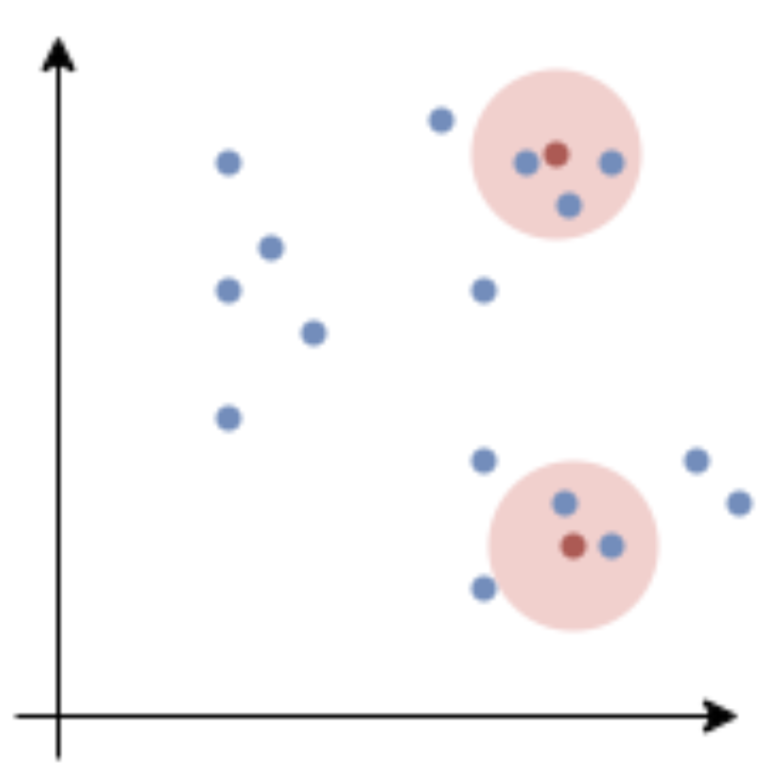

La densidad mide cu√°ntos puntos u observaciones caben dentro del radio  œµ . En la imagen de arriba se observan dos c√≠rculos; en uno de ellos, tres puntos azules est√°n dentro del √°rea sombreada; mientras que en el otro, hay dos al interior. Entonces, esta cantidad se divide entre el √°rea del c√≠rculo.

Si el √°rea sombreada mide  1cm2 , entonces se dice que existen tres observaciones por cent√≠metro cuadrado en el primer c√≠rculo y dos observaciones por cent√≠metro cuadrado en el segundo.

Este modelo genera distintos puntos  p  y determina en cu√°les puntos existe una mayor densidad. Como te imaginas, es posible establecer el valor de  œµ  as√≠ como los valores  p  m√≠nimos que deben existir.

Para finalizar este ejemplo, cabe recordar que se analiz√≥ desde una perspectiva 2D; sin embargo, tambi√©n se aplica a planos 3D (de tres variables), donde  œµ  se convertir√° en una esfera. Aunque resulta dif√≠cil pensar en planos de m√°s de tres dimensiones, este modelo se adapta (desde las perspectiva matem√°tica) a cubrir cuantas dimensiones sean necesarias, de manera que si hubiese n-dimensiones, entonces  œµ  ser√° una esfera de n-dimensiones.

Para este caso seguiremos cuando el dataset y toda la preparaci√≥n del ejemplo de K-means


In [ ]:
from sklearn.cluster import DBSCAN
density = DBSCAN(eps= 30, min_samples= 3, metric= 'euclidean')
y_density = density.fit_predict(df1)


Dentro de los par√°metros que solicita este modelo se encuentran los siguientes:

- **eps**: tama√±o del c√≠rculo o n-esfera de  œµ .
- **min_sample**: cantidad m√≠nima de observaciones que debe tener un punto  p  para considerarse un cluster.
- **metric**: el tipo de m√©trica a usar. Por lo general, se elige la distancia euclidiana.

In [ ]:
y_density

array([ 0,  0,  1, -1,  2, -1,  3,  3,  0,  0, -1,  3,  3, -1, -1,  3,  3,
        0, -1,  4,  2,  2,  0,  0,  4,  4,  1,  3,  4,  0,  3, -1,  0, -1,
        0,  4,  4,  0,  0,  2,  2,  0,  0,  2,  4,  0,  0,  0,  0,  3, -1,
        3,  1, -1,  0,  0,  0,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2, -1,  4,  2,  2,  0,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  4,  4,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  4,  4,  2])

Presta especial atenci√≥n al resultado que arroja. Notar√°s muchos puntos llamados -1. Esto se debe a que estas observaciones no entraron dentro de un cluster. Para solucionarlo, se incrementa eps ( œµ ) o se disminuye la cantidad en min_samples; sin embargo, estas soluciones pueden aumentar el n√∫mero de clusters.

A diferencia de otros modelos, aqu√≠ no se indica la cantidad de clusters, porque el uso de este modelo depende de tus necesidades.

In [ ]:
np.unique(y_density, return_counts= True)

(array([-1,  0,  1,  2,  3,  4]), array([ 12,  22,   3, 115,  12,  14]))

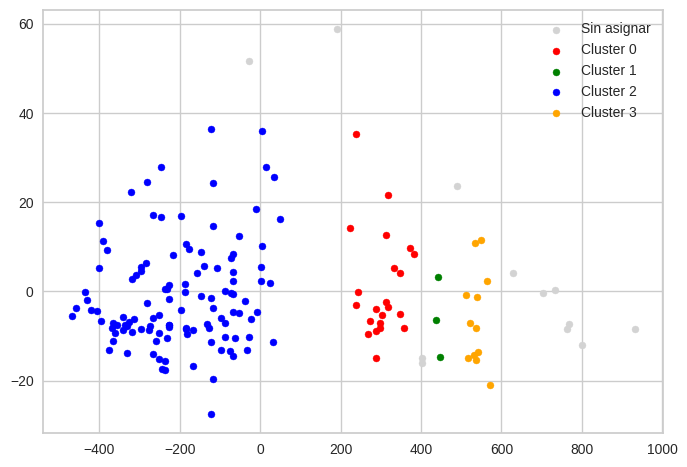

In [ ]:
plt.scatter(df1[y_density == -1, 0], df1[y_density == -1, 1], s = 100, marker= '.', c = "lightgray", label = "Sin asignar")
plt.scatter(df1[y_density == 0, 0], df1[y_density == 0, 1], s = 100, marker= '.', c = "red", label = "Cluster 0")
plt.scatter(df1[y_density == 1, 0], df1[y_density == 1, 1], s = 100, marker= '.', c = "green", label = "Cluster 1")
plt.scatter(df1[y_density == 2, 0], df1[y_density == 2, 1], s = 100, marker= '.', c = "blue", label = "Cluster 2")
plt.scatter(df1[y_density == 3, 0], df1[y_density == 3, 1], s = 100, marker= '.', c = "orange", label = "Cluster 3")
plt.legend()
plt.show()


El funcionamiento de DBSCAN se basa en dos par√°metros principales:

- **Œµ (epsilon)**: Un par√°metro de distancia que define el radio alrededor de un punto para considerar a sus vecinos.
- **MinPts (Puntos M√≠nimos)**: El n√∫mero m√≠nimo de puntos requeridos para formar un cluster denso.

Un punto p se considera como un punto central si al menos MinPts puntos se encuentran dentro de un radio Œµ de √©l (incluy√©ndose a s√≠ mismo). Estos puntos dentro del radio Œµ son llamados puntos directamente alcanzables desde p.

El algoritmo DBSCAN procede de la siguiente manera:

1. Para cada punto en el conjunto de datos:
  - Si el punto ya ha sido visitado, contin√∫a al siguiente punto.
  - Marca el punto como visitado.
  - Encuentra todos los puntos vecinos dentro del radio Œµ del punto actual.
  - Si el n√∫mero de vecinos es menor que MinPts, marca el punto como ruido (aunque este punto podr√≠a ser encontrado m√°s tarde como parte de un cluster).
  - Si el punto es un punto central (tiene MinPts o m√°s vecinos, incluy√©ndose a s√≠ mismo), inicia la expansi√≥n del cluster. Agrega todos los puntos alcanzables a este cluster, posiblemente marcando como cluster puntos que previamente se hab√≠an marcado como ruido.
2. Expansi√≥n del Cluster:
  - Para cada nuevo punto agregado al cluster, encuentra todos sus vecinos dentro del radio Œµ.
  - Si un vecino es un punto central, repite el proceso de expansi√≥n del cluster con este nuevo punto central.


Y como nada es perfecto, el m√©todo de DBSCAN tiene diversas desventajas como las siguientes:

Sensibilidad a los Par√°metros: La selecci√≥n de Œµ y MinPts puede tener un gran impacto en los resultados del clustering.
Dificultad con Densidades Variables: DBSCAN puede tener dificultades para identificar clusters en datos con variaciones significativas en la densidad.

Pero tambi√©n tiene m√∫ltiples ventajas que lo hacen una opci√≥n viable

- Flexibilidad en la Forma de los Clusters: Puede encontrar clusters de formas arbitrarias.
- Robusto frente al Ruido: Capaz de identificar y excluir puntos de ruido.
- No necesita el n√∫mero de clusters: A diferencia de K-means, no es necesario especificar el n√∫mero de clusters de antemano.

DBSCAN es especialmente √∫til en aplicaciones de detecci√≥n de anomal√≠as, an√°lisis de im√°genes, y cualquier dominio donde la intuici√≥n de "densidad" y "ruido" sea √∫til para identificar agrupaciones naturales en los datos. Su capacidad para manejar clusters de formas no esf√©ricas y su robustez frente al ruido lo hacen adecuado para conjuntos de datos complejos y de la vida real.

Ahora que ya tenemos comprendidos dos de los m√©todos m√°s populares de clustering vamos a una de las tareas m√°s importantes y que ya tratamos un poco en este m√≥dulo, el PCA


## 5.2 Reducci√≥n de dimensionalidad
### 5.2.1 An√°lisis de componentes principales (PCA)

El An√°lisis de Componentes Principales (PCA, por sus siglas en ingl√©s) es una t√©cnica de reducci√≥n de dimensionalidad utilizada en el campo del aprendizaje autom√°tico y la estad√≠stica para describir un conjunto de datos en t√©rminos de nuevas variables ("componentes") no correlacionadas. Los componentes se ordenan por la cantidad de varianza original que cada uno captura del conjunto de datos.

El objetivo de PCA es encontrar una proyecci√≥n que transforme los datos originales X (con n variables) en un nuevo espacio de caracter√≠sticas de menor dimensi√≥n (con k variables, donde k<n) de manera que se maximice la varianza de los datos en este nuevo espacio. Esto se logra a trav√©s de la diagonalizaci√≥n de la matriz de covarianza de los datos o, equivalentemente, mediante la descomposici√≥n en valores singulares (SVD) de la matriz de datos.

Internamente el proceso de PCA realiza lo siguiente:

1. Estandarizaci√≥n de los Datos: Dado un conjunto de datos X de dimensiones m√ón (donde m es el n√∫mero de muestras y n es el n√∫mero de caracter√≠sticas), se estandarizan las caracter√≠sticas para tener media 0 y varianza 1.
Matriz de Covarianza: Se calcula la matriz de covarianza C de los datos estandarizados. La matriz de covarianza captura c√≥mo cambian conjuntamente las variables.
2. Descomposici√≥n en Valores Propios: Se calculan los valores propios y los vectores propios de la matriz de covarianza. Los vectores propios representan las direcciones de m√°xima varianza (componentes principales), y los valores propios corresponden a la magnitud de la varianza que cada componente principal captura.
3. Selecci√≥n de Componentes Principales: Se seleccionan los k vectores propios que corresponden a los k mayores valores propios para formar la matriz de proyecci√≥n W. Esta matriz transforma los datos originales en el nuevo espacio de caracter√≠sticas.
4. Transformaci√≥n de los Datos: Los datos originales X se proyectan en el nuevo espacio de caracter√≠sticas usando la matriz W para obtener los datos transformados Y.

Para ver c√≥mo se implementa el PCA con Python revisa el siguiente c√≥digo:


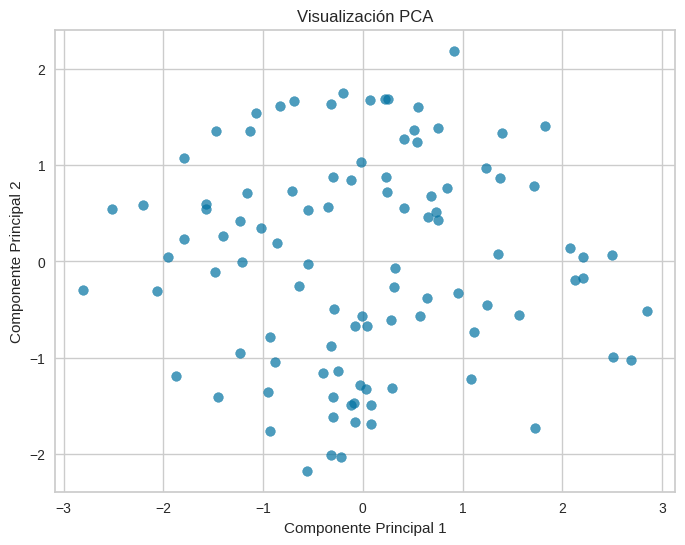

Varianza explicada por cada componente: [0.29005782 0.23214006]


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generaci√≥n de un conjunto de datos de ejemplo
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 muestras, 5 caracter√≠sticas

# Estandarizaci√≥n de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicaci√≥n de PCA
pca = PCA(n_components=2)  # Reducir a 2 componentes
X_pca = pca.fit_transform(X_scaled)

# Visualizaci√≥n de los datos transformados
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('Componente Principal 1')

plt.ylabel('Componente Principal 2')
plt.title('Visualizaci√≥n PCA')
plt.show()

# Varianza explicada por cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

Este c√≥digo realiza PCA sobre un conjunto de datos sint√©tico, reduciendo su dimensionalidad de 5 caracter√≠sticas a 2 componentes principales, y luego visualiza los datos transformados. La varianza explicada por cada componente se imprime al final, indicando cu√°nta informaci√≥n (varianza) captura cada componente del conjunto de datos original.

PCA es una herramienta poderosa para la reducci√≥n de dimensionalidad, visualizaci√≥n de datos, y preprocesamiento para otros algoritmos de aprendizaje autom√°tico. Al capturar las direcciones de m√°xima varianza, PCA puede revelar estructuras subyacentes en los datos que podr√≠an no ser evidentes de inmediato. Sin embargo, es importante recordar que PCA asume linealidad en los datos y puede no ser adecuado para todos los conjuntos de datos, especialmente aquellos con relaciones no lineales complejas.

El PCA no es el √∫nico m√©todo de reducci√≥n de columnas o dimensiones, existe otra opci√≥n la cual vamos a revisar a continuaci√≥n:

### 5.2.2 T-distributed stochastic neighbor embedding (t-SNE)

t-SNE (t-Distributed Stochastic Neighbor Embedding) es una t√©cnica avanzada de reducci√≥n de dimensionalidad y visualizaci√≥n de datos de alta dimensi√≥n en un espacio de menor dimensi√≥n, idealmente en dos o tres dimensiones. Es especialmente √∫til para la exploraci√≥n y visualizaci√≥n de estructuras complejas en grandes conjuntos de datos.

t-SNE comienza por convertir las distancias entre los puntos en probabilidades condicionales que representan similitudes. La similitud entre dos puntos xi y xj en el espacio de alta dimensi√≥n se mide por la probabilidad condicional pj‚à£i, que es proporcional a la densidad de probabilidad de xj en relaci√≥n con xi bajo una distribuci√≥n Gaussiana centrada en xi.

La probabilidad pij es la media sim√©trica de pj‚à£i y pi‚à£j


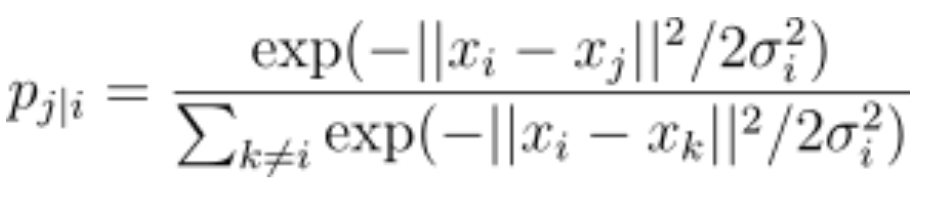

En el espacio de baja dimensi√≥n, t-SNE utiliza una distribuci√≥n t-Student con un grado de libertad para definir las probabilidades qij entre puntos, reduciendo as√≠ el problema de agrupamiento excesivo (crowding problem) y permitiendo una mejor representaci√≥n visual de los clusters.

La probabilidad conjunta pij se define como la media sim√©trica de las probabilidades condicionadas pj‚à£i y pi‚à£j, lo que hace que la medida de similitud sea m√°s robusta y menos sensible a las variaciones en la densidad de los datos.
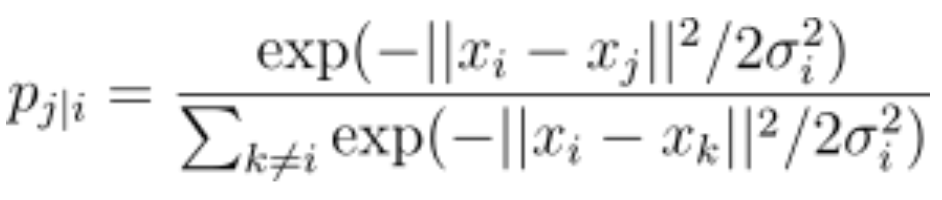


Probabilidad en el Espacio de Baja Dimensi√≥n qij: Esta f√≥rmula define las probabilidades qij en el espacio de baja dimensi√≥n utilizando una distribuci√≥n t-Student con un grado de libertad. El objetivo es mitigar el problema de crowding y permitir una separaci√≥n m√°s clara entre los clusters en la visualizaci√≥n.

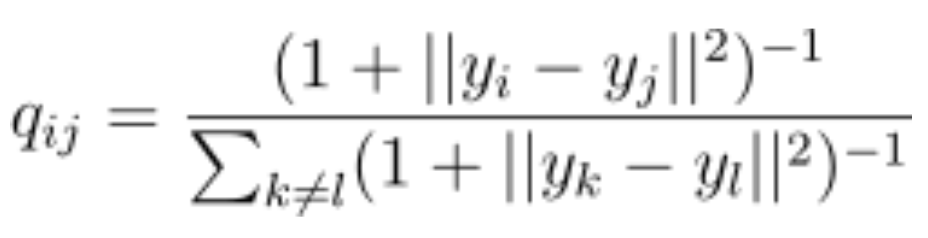

El objetivo es minimizar la divergencia de Kullback-Leibler (KL) entre las distribuciones de probabilidad en el espacio de alta dimensi√≥n P y en el espacio de baja dimensi√≥n Q, lo cual se logra ajustando las posiciones de los puntos en el espacio de baja dimensi√≥n.

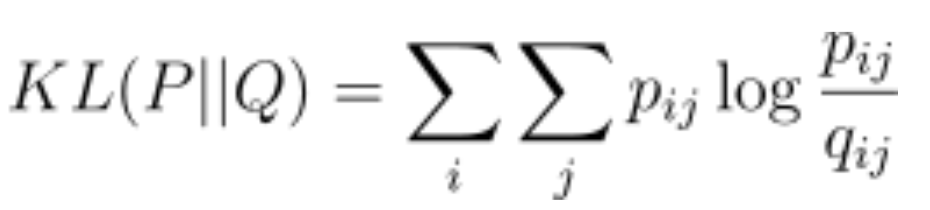

La divergencia de Kullback-Leibler es una medida de cu√°nto se diferencia una probabilidad de distribuci√≥n P de otra distribuci√≥n de probabilidad Q. t-SNE minimiza esta divergencia para hacer que la distribuci√≥n de baja dimensi√≥n refleje lo m√°s fielmente posible la estructura de los datos en alta dimensi√≥n.

Ahora vamos a realizar una implementaci√≥n en Python


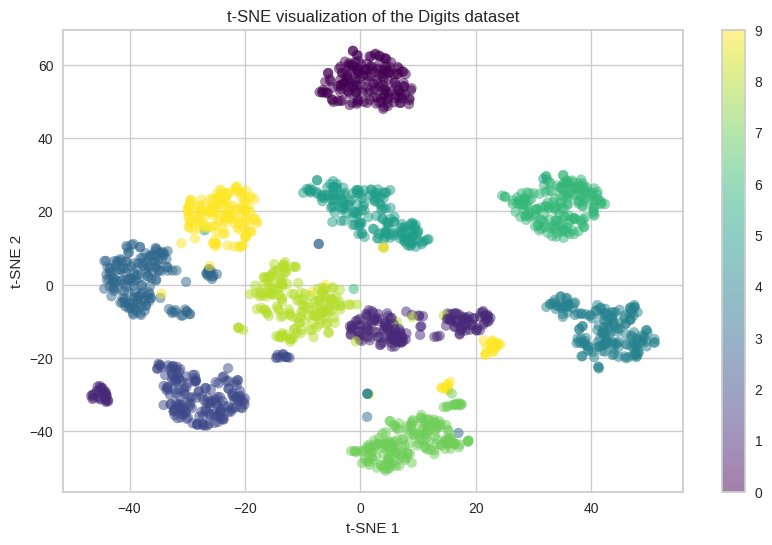

In [ ]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Cargamos el conjunto de datos de d√≠gitos
digits = load_digits()
X = digits.data
y = digits.target

# Aplicamos t-SNE para reducir la dimensionalidad a 2D
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

# Visualizamos el resultado
plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title('t-SNE visualization of the Digits dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


Este c√≥digo reduce la dimensionalidad de un conjunto de datos de d√≠gitos escritos a mano y visualiza los datos transformados, donde cada punto representa una imagen de un d√≠gito y su color representa la clase del d√≠gito.

Como todos los m√©todos, existen ventajas y desventajas en su implementaci√≥n.

Ventajas:
- Excelente para visualizar datos de alta dimensi√≥n en espacios de 2D o 3D.
- Capaz de revelar estructuras complejas y clusters en los datos.

Desventajas:
- Sensible a la elecci√≥n de par√°metros como la perplejidad y el n√∫mero de iteraciones.
- No garantiza la misma salida en diferentes ejecuciones debido a su naturaleza estoc√°stica.
- Computacionalmente intensivo, especialmente en grandes conjuntos de datos.

t-SNE es ampliamente utilizado en an√°lisis exploratorio de datos, especialmente para visualizar conjuntos de datos de alta dimensi√≥n en campos como la bioinform√°tica, la medicina, y las ciencias sociales. Tambi√©n se utiliza para la inspecci√≥n visual de los resultados de algoritmos de aprendizaje autom√°tico, como la verificaci√≥n de la efectividad de la agrupaci√≥n (clustering) o la detecci√≥n de anomal√≠as.

t-SNE es una poderosa herramienta para la visualizaci√≥n de datos de alta dimensi√≥n que puede revelar estructuras intrincadas ocultas dentro de grandes conjuntos de datos. Aunque es altamente efectivo, el uso adecuado de t-SNE requiere una comprensi√≥n de sus par√°metros y limitaciones, especialmente cuando se trata de interpretar los resultados y aplicarlos a problemas del mundo real.

Ahora pasemos a otro tema, las reglas de asociaci√≥n que nos indican las condiciones para que un elemento se adhiera a un cluster u otro

## 5.3 Reglas de asociaci√≥n
### 5.3.1 Algoritmo Apriori

Las reglas de asociaci√≥n son una t√©cnica clave en el an√°lisis de datos para descubrir interesantes relaciones entre variables en grandes bases de datos. Son ampliamente utilizadas en diversos campos como el marketing, la detecci√≥n de fraudes, y el an√°lisis de cestas de la compra en el retail. Una de las metodolog√≠as m√°s famosas para encontrar estas reglas es el algoritmo Apriori.

El algoritmo Apriori se basa en la idea de que una subconjunto frecuente debe ser parte de un conjunto frecuente. Utiliza un enfoque iterativo conocido como "nivel por nivel" donde k-items sets se utilizan para explorar (k+1)-items sets.

**Soporte (Support)**: La frecuencia con la que aparece un conjunto de √≠tems en el dataset. Para un conjunto de √≠tems A, se calcula como la proporci√≥n de transacciones en la base de datos que contienen A.


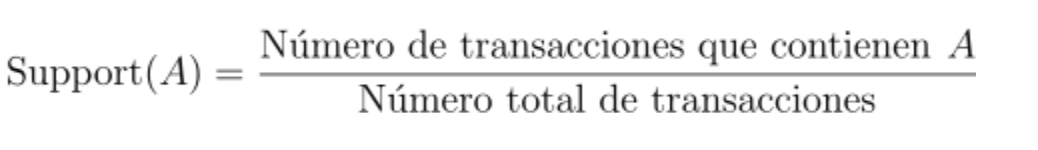

**Confianza (Confidence)**: Mide la frecuencia con la que los √≠tems en B aparecen en transacciones que contienen A. Es una medida de la probabilidad condicional P(B‚à£A).

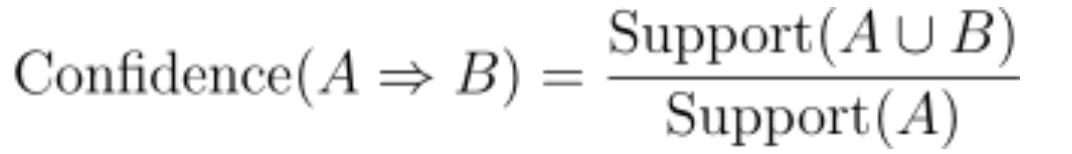

**Elevaci√≥n (Lift)**: La raz√≥n de la confianza de una regla y el soporte esperado de B si A y B fueran independientes. Un valor de elevaci√≥n mayor a 1 indica una fuerte asociaci√≥n.

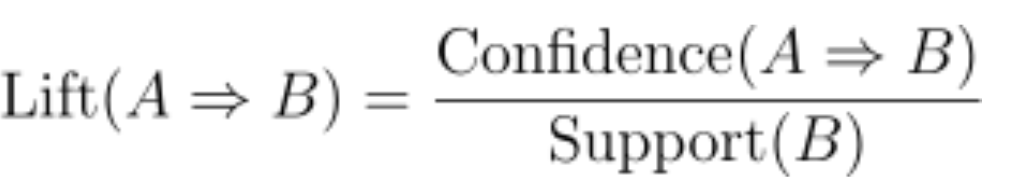

Para implementar este algoritmo en Python Vamos a usar la biblioteca mlxtend:

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Ejemplo de dataset de transacciones
dataset = [['Leche', 'Pan', 'Cereal'],
           ['Pan', 'Huevos', 'Mantequilla'],
           ['Leche', 'Pan', 'Huevos'],
           ['Leche', 'Huevos']]

# Preprocesamiento
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Aplicando Apriori
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

# Generando reglas de asociaci√≥n
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print(frequent_itemsets)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


   support         itemsets
0     0.75         (Huevos)
1     0.75          (Leche)
2     0.75            (Pan)
3     0.50  (Huevos, Leche)
4     0.50    (Huevos, Pan)
5     0.50     (Leche, Pan)
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


Los muestran tanto los conjuntos de √≠tems frecuentes como las reglas de asociaci√≥n generadas a partir del conjunto de datos de ejemplo.

Los conjuntos de √≠tems frecuentes con un soporte de al menos 0.5 (50%) son:

- √çtems Individuales:
  - Huevos, Leche, Pan: Cada uno aparece en el 75% de las transacciones. Esto indica que son productos com√∫nmente comprados, presentes en la mayor√≠a de las transacciones.
- Pares de √çtems:
  - (Leche, Huevos), (Pan, Huevos), (Pan, Leche): Cada par aparece en el 50% de las transacciones. Estos pares representan combinaciones de productos que los clientes tienden a comprar juntos con relativa frecuencia.


La salida indica que no se han generado reglas de asociaci√≥n que cumplan con el umbral de confianza m√≠nimo de 0.7. Esto significa que, aunque ciertos productos se compran frecuentemente juntos, no hay una confianza suficientemente alta en las transacciones analizadas para afirmar que la compra de un producto implica la compra de otro con al menos un 70% de certeza.

Productos Populares: Huevos, Leche y Pan son claramente productos populares dentro de este dataset, ya que aparecen en tres cuartas partes de las transacciones. Esto podr√≠a indicar que son productos b√°sicos para los clientes.


- Compras Combinadas: Las combinaciones de Leche y Huevos, Pan y Huevos, y Pan y Leche, sugieren que estos productos tienden a ser comprados juntos en la mitad de las ocasiones. Esto podr√≠a ser √∫til para estrategias de marketing, como ofertas cruzadas o promociones.
- Ausencia de Reglas Fuertes: La falta de reglas de asociaci√≥n con una alta confianza sugiere que, aunque hay patrones de compra en com√∫n, no hay una relaci√≥n fuerte y consistente en este conjunto de datos que indique que la compra de un producto garantice la compra de otro. Esto puede deberse a la diversidad en las preferencias de compra o a que el conjunto de datos es demasiado peque√±o para derivar conclusiones firmes.
- Estrategias de Negocio: Para una tienda, conocer los √≠tems que se compran juntos frecuentemente puede ayudar en la disposici√≥n de los productos dentro de la tienda para incentivar la venta cruzada, o en el dise√±o de ofertas especiales que incluyan estos productos. Sin embargo, la ausencia de reglas fuertes tambi√©n sugiere la importancia de explorar otros datos o t√©cnicas para comprender mejor las preferencias de los clientes.
- Consideraciones Adicionales: La ausencia de reglas fuertes puede motivar el ajuste de los par√°metros de soporte y confianza para explorar si se pueden encontrar reglas significativas con criterios menos estrictos. Adem√°s, podr√≠a ser √∫til ampliar el conjunto de datos o incluir m√°s caracter√≠sticas de las transacciones para obtener insights m√°s profundos.


Ya una vez interpretados los resultados y entendido mejor como funciona el algoritmo Apriori veamos algunas ventajas y desventajas

Ventajas:
- Simple y f√°cil de entender.
- Puede manejar grandes vol√∫menes de datos.
- Identifica relaciones √∫tiles entre variables.

Desventajas:
- Puede generar un gran n√∫mero de reglas, muchas de las cuales pueden no ser √∫tiles.
- La elecci√≥n de los umbrales de soporte y confianza puede ser arbitraria y afectar los resultados.
- El rendimiento puede disminuir con datasets muy grandes debido a la necesidad de m√∫ltiples barridos a trav√©s de los datos.

El algoritmo Apriori es una herramienta fundamental en miner√≠a de datos para descubrir reglas de asociaci√≥n. Aunque enfrenta desaf√≠os en t√©rminos de eficiencia y selecci√≥n de par√°metros, sigue siendo ampliamente utilizado por su capacidad para revelar relaciones interesantes y no triviales en grandes conjuntos de datos.

Ahora veamos otro tipo de regla de asociaci√≥n.


## 5.3.2 Algoritmo FP-Growth

El algoritmo FP-Growth (Frequent Pattern Growth) es una t√©cnica eficiente para la extracci√≥n de conjuntos de √≠tems frecuentes, que son conjuntos de elementos que aparecen juntos con frecuencia en un dataset. A diferencia del algoritmo Apriori, que es ampliamente utilizado para el mismo prop√≥sito, FP-Growth mejora significativamente la eficiencia al eliminar la necesidad de candidatos a generar y testear, reduciendo as√≠ el costo computacional.

FP-Growth utiliza una estructura de datos llamada FP-tree (Frequent Pattern Tree) para comprimir el dataset en un formato condensado, preservando la informaci√≥n de los conjuntos de √≠tems frecuentes. El proceso de FP-Growth se puede dividir en dos pasos principales:

- Construcci√≥n del FP-tree: Primero, crea una lista de √≠tems frecuentes ordenados por frecuencia descendente. Luego, construye el FP-tree pasando por cada transacci√≥n del dataset y trazando un camino en el √°rbol. Si un prefijo de la transacci√≥n ya existe, incrementa los contadores de nodos existentes; de lo contrario, crea nuevos nodos.
- Extracci√≥n de Conjuntos de √çtems Frecuentes: A partir del FP-tree, extrae conjuntos de √≠tems frecuentes utilizando un enfoque recursivo. Para cada √≠tem en el √°rbol, considera todas las posibles combinaciones de √≠tems frecuentes que incluyen ese √≠tem y calcula su soporte contando las ocurrencias en el √°rbol.

Para implementar el algoritmo FP-Growth en Python, podemos utilizar la biblioteca mlxtend:


In [ ]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Ejemplo de dataset de transacciones
dataset = [['Milk', 'Bread', 'Apples'],
           ['Bread', 'Eggs', 'Butter'],
           ['Milk', 'Bread', 'Eggs'],
           ['Milk', 'Eggs']]

# Preprocesamiento
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Aplicaci√≥n de FP-Growth
frequent_itemsets = fpgrowth(df, min_support=0.5, use_colnames=True)

print(frequent_itemsets)

   support       itemsets
0     0.75         (Milk)
1     0.75        (Bread)
2     0.75         (Eggs)
3     0.50  (Bread, Milk)
4     0.50  (Bread, Eggs)
5     0.50   (Eggs, Milk)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Este c√≥digo genera conjuntos de √≠tems frecuentes utilizando FP-Growth basado en un soporte m√≠nimo del 50%. La salida mostrar√° los conjuntos de √≠tems que cumplen con este criterio de soporte.

**√çtems Individuales:**
- Milk, Bread, y Eggs tienen un soporte del 75%, lo que significa que cada uno de estos √≠tems aparece en el 75% de todas las transacciones (3 de 4 transacciones). Esto indica que son los productos m√°s populares o comunes comprados juntos en este peque√±o dataset.

**Pares de √çtems:**
- Los conjuntos de √≠tems (Bread, Milk), (Bread, Eggs), y (Milk, Eggs) tienen cada uno un soporte del 50%. Esto significa que estos pares de productos aparecen juntos en el 50% de todas las transacciones (2 de 4 transacciones). Estos pares representan combinaciones de productos que los clientes tienden a comprar juntos con una frecuencia relativamente alta, dada la escala de este dataset.

**Productos Centrales**: La leche, el pan y los huevos son claramente elementos esenciales para los clientes representados en este dataset. Dado su alto soporte individual, estos √≠tems podr√≠an ser considerados como productos b√°sicos en un entorno de retail o supermercado.

**Oportunidades de Marketing Cruzado**: Las combinaciones de (Bread, Milk), (Bread, Eggs), y (Milk, Eggs) sugieren oportunidades para marketing cruzado o promociones. Por ejemplo, ofrecer descuentos en huevos cuando se compra leche podr√≠a incentivar ventas adicionales.

**Estrategias de Inventario**: El alto soporte de estos √≠tems y sus combinaciones sugiere que deber√≠an ser mantenidos en stock con prioridad para evitar p√©rdidas de ventas. Adem√°s, estos √≠tems podr√≠an ser colocados juntos en la tienda para aumentar la conveniencia del cliente y fomentar la compra por impulso de productos relacionados.

**An√°lisis de FP-Growth:** La eficiencia del algoritmo FP-Growth se demuestra en su capacidad para identificar r√°pidamente estos conjuntos de √≠tems frecuentes sin la necesidad de generar candidatos, como se requerir√≠a en el enfoque Apriori. Esto es particularmente ventajoso cuando se trabaja con datasets grandes.

Antes de elegir este algoritmo como tu opci√≥n vamos a repasar sus ventajas y desventajas.

**Ventajas:**
- Eficiencia: FP-Growth es significativamente m√°s eficiente que Apriori, ya que no necesita generar y testear expl√≠citamente conjuntos de √≠tems candidatos.
- Escalabilidad: Maneja grandes datasets de manera m√°s efectiva que otros algoritmos de extracci√≥n de conjuntos de √≠tems frecuentes.
- Menor Costo Computacional: Al utilizar la estructura FP-tree, reduce la cantidad de barridos completos del dataset.

**Desventajas:**
- Complejidad de Implementaci√≥n: La estructura y el proceso de extracci√≥n del FP-tree son m√°s complejos que los m√©todos basados en candidatos.
- Uso de Memoria: La construcci√≥n de un FP-tree puede requerir una cantidad significativa de memoria si el dataset es grande y hay muchos conjuntos de √≠tems frecuentes.

FP-Growth es un algoritmo poderoso y eficiente para la extracci√≥n de conjuntos de √≠tems frecuentes, ofreciendo ventajas significativas en t√©rminos de eficiencia y escalabilidad sobre t√©cnicas anteriores como Apriori. Sin embargo, su complejidad de implementaci√≥n y potencial uso intensivo de memoria son consideraciones importantes. En aplicaciones de an√°lisis de grandes vol√∫menes de datos para identificar patrones y tendencias, FP-Growth puede proporcionar insights valiosos y mejorar la toma de decisiones basada en datos.

Sabiendo todo esto ahora nos queda aprender sobre una de las utilidades m√°s usadas en los modelos de agrupamiento y es la detecci√≥n de anomal√≠as.


# 5.4 Detecci√≥n de anomal√≠as
## 5.4.1 Isolation Forest

La detecci√≥n de anomal√≠as es un proceso importante en el an√°lisis de datos para identificar patrones inusuales que no se ajustan al comportamiento esperado. Un m√©todo efectivo para la detecci√≥n de anomal√≠as es el Isolation Forest, un algoritmo basado en √°rboles que se especializa en identificar anomal√≠as de manera eficiente en grandes conjuntos de datos.

El Isolation Forest (IForest) es un algoritmo basado en la idea de que las anomal√≠as son pocos y diferentes en sus caracter√≠sticas, lo que las hace m√°s f√°ciles de 'aislar' que los puntos normales. Este algoritmo utiliza √°rboles de decisi√≥n para aislar puntos. Cada √°rbol en un Isolation Forest aisla un punto seleccionando aleatoriamente una caracter√≠stica y luego seleccionando aleatoriamente un valor de divisi√≥n entre los valores m√°ximo y m√≠nimo de la caracter√≠stica seleccionada.

El proceso que sigue el Isolation Forest es el siguiente:

Construcci√≥n de √Årboles de Aislamiento: Para construir un √°rbol, se selecciona un subconjunto aleatorio del conjunto de datos y luego se seleccionan caracter√≠sticas y valores de corte aleatorios para aislar cada observaci√≥n.
Puntuaci√≥n de Anomal√≠a: La puntuaci√≥n de anomal√≠a se basa en la longitud del camino promedio que toma para aislar una muestra. Las anomal√≠as requerir√°n menos divisiones para ser aisladas y, por lo tanto, tendr√°n caminos m√°s cortos en el √°rbol.

La puntuaci√≥n de anomal√≠a de una muestra se calcula como:

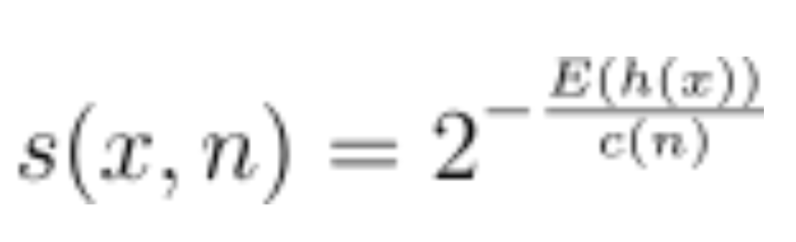

Donde:

- s(x,n): Esta es la puntuaci√≥n de anomal√≠a para una muestra x dada, donde n es el n√∫mero de muestras en el conjunto de entrenamiento. La puntuaci√≥n est√° en el rango de 0 a 1, donde valores m√°s cercanos a 1 indican una mayor probabilidad de ser una anomal√≠a.
- E(h(x)): Representa la longitud del camino promedio de la muestra x a trav√©s de todos los √°rboles en el bosque. En el contexto del Isolation Forest, el "camino" se refiere al n√∫mero de divisiones necesarias para aislar completamente la muestra x. Para las anomal√≠as, que son m√°s f√°ciles de aislar, se espera que este n√∫mero sea menor en comparaci√≥n con los puntos normales.
- c(n): Es el factor de normalizaci√≥n, que se calcula como la longitud del camino promedio en un √Årbol Binario de B√∫squeda (BST) equilibrado con n nodos. Sirve para normalizar la longitud del camino promedio E(h(x)) de manera que la puntuaci√≥n de anomal√≠a sea independiente del n√∫mero de muestras en el conjunto de entrenamiento. La f√≥rmula para c(n) es algo compleja y se relaciona con las propiedades esperadas de los caminos en los √°rboles binarios.
- La puntuaci√≥n de anomal√≠a se calcula como el negativo de la potencia de 2 elevada al resultado de la longitud del camino promedio E(h(x)) dividido por el factor de normalizaci√≥n c(n). Esta formulaci√≥n asegura que las muestras que tienen caminos m√°s cortos (y, por lo tanto, son m√°s f√°ciles de aislar) reciban puntuaciones de anomal√≠a m√°s altas.

Ya que tenemos las bases te√≥ricas, vamos a la pr√°ctica:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


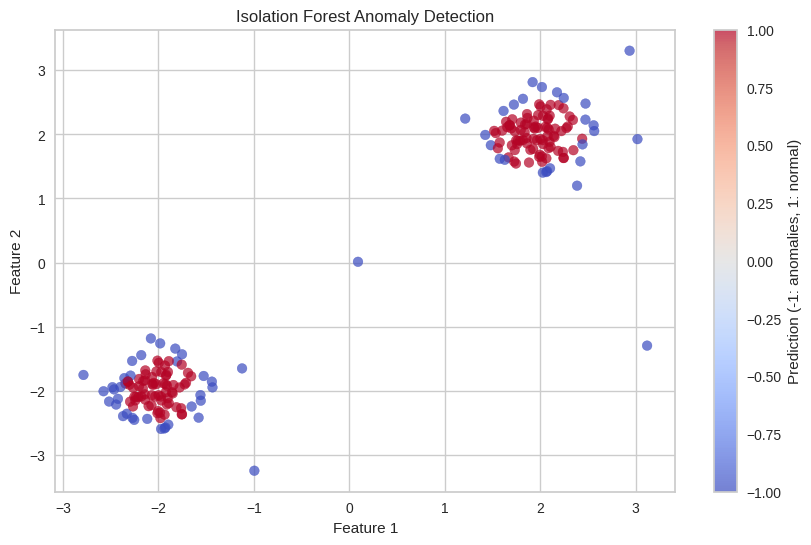

In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

# Generaci√≥n de datos: 100 puntos normales y 10 anomal√≠as
rng = np.random.RandomState(42)
X_normal = 0.3 * rng.randn(100, 2)
X_anomalies = rng.uniform(low=-4, high=4, size=(10, 2))
X = np.r_[X_normal + 2, X_normal - 2, X_anomalies]

# Creaci√≥n del modelo Isolation Forest
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X)

# Predicciones (-1 para anomal√≠as, 1 para normales)
y_pred = clf.predict(X)

# Visualizaci√≥n de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', alpha=0.7)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Prediction (-1: anomalies, 1: normal)')
plt.show()

- La mayor√≠a de los puntos normales est√°n agrupados alrededor de los centros (2, 2) y (-2, -2) coloreados mayoritariamente con el color que indica puntos normales.
- Los puntos an√≥malos, que fueron generados para estar dispersos en un rango m√°s amplio, probablemente estar√°n m√°s aislados y coloreados con el color que indica anomal√≠as.
- Esta visualizaci√≥n ayuda a entender c√≥mo Isolation Forest puede identificar efectivamente anomal√≠as en el conjunto de datos bas√°ndose en cu√°n alejados est√°n los puntos.

Ahora hablemos de las ventajas y desventajas de este modelo:

**Ventajas:**
- Eficiencia: Funciona bien con grandes conjuntos de datos y es eficiente en t√©rminos de tiempo de ejecuci√≥n y uso de memoria.
- No requiere etiquetado: Como m√©todo no supervisado, no necesita etiquetas de datos para entrenar.
- Flexibilidad: Efectivo tanto para detecci√≥n de anomal√≠as puntuales como contextuales.

**Desventajas:**
- Selecci√≥n de Par√°metros: La elecci√≥n de par√°metros como max_samples y contamination puede ser no trivial y afectar significativamente el rendimiento.
- Sensibilidad a la Configuraci√≥n: Puede ser sensible a la configuraci√≥n del modelo y requerir ajustes finos para optimizar el rendimiento.

Isolation Forest es una herramienta poderosa y eficiente para la detecci√≥n de anomal√≠as en conjuntos de datos complejos. Su enfoque √∫nico para aislar observaciones lo hace particularmente efectivo para identificar puntos de datos que son sustancialmente diferentes de la mayor√≠a. Sin embargo, como con cualquier algoritmo, la comprensi√≥n y la cuidadosa selecci√≥n de sus par√°metros es clave para lograr un rendimiento √≥ptimo en aplicaciones del mundo real.

Y para concluir esta unidad (m√°s larga de lo normal porque el tema lo amerita) veamos otro m√©todo de detecci√≥n de anomal√≠as



## 5.4.2 One-class SVM

One-Class SVM (Support Vector Machine) es una variante del SVM tradicional que se utiliza para la detecci√≥n de anomal√≠as, es decir, identificar patrones de datos que no se ajustan al comportamiento esperado. A diferencia de los SVM tradicionales, que se utilizan para clasificar datos en dos o m√°s categor√≠as, One-Class SVM se enfoca en identificar un l√≠mite que separa los datos normales (la "clase √∫nica") de las anomal√≠as.

El objetivo de One-Class SVM es encontrar un hiperplano en un espacio de caracter√≠sticas transformado (a trav√©s de una funci√≥n kernel) que separe mejor los datos "normales" del origen (en este espacio transformado), maximizando la distancia de este hiperplano al origen. Esto se logra resolviendo el siguiente problema de optimizaci√≥n:

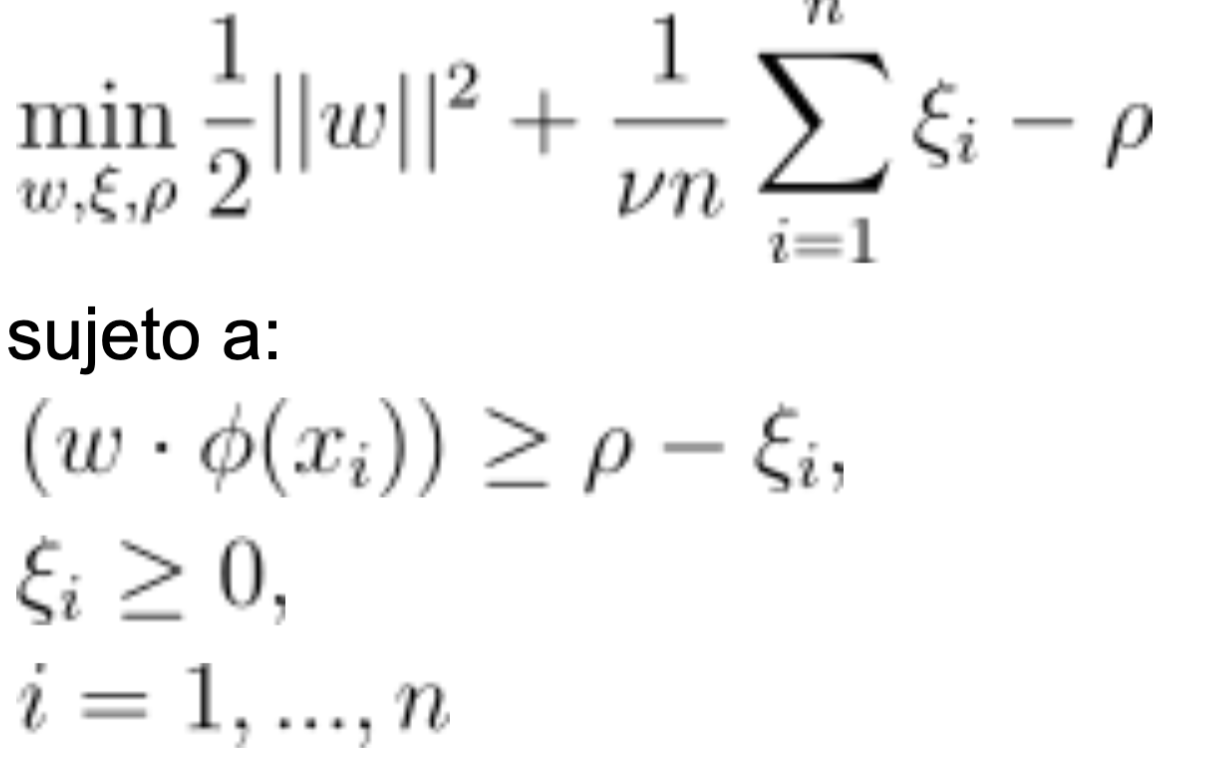

donde:

- w es el vector normal al hiperplano,
- œï(xi) es la funci√≥n de mapeo al espacio de caracter√≠sticas,
- Œæi son las variables de holgura que permiten outliers,
- œÅ es el desplazamiento del hiperplano desde el origen en el espacio de caracter√≠sticas,
- ŒΩ (0 < ŒΩ < 1) es un par√°metro que establece un l√≠mite superior en la fracci√≥n de outliers y un l√≠mite inferior en la fracci√≥n de vectores de soporte.

A continuaci√≥n, veamos c√≥mo implementar un One-Class SVM utilizando scikit-learn para la detecci√≥n de anomal√≠as:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


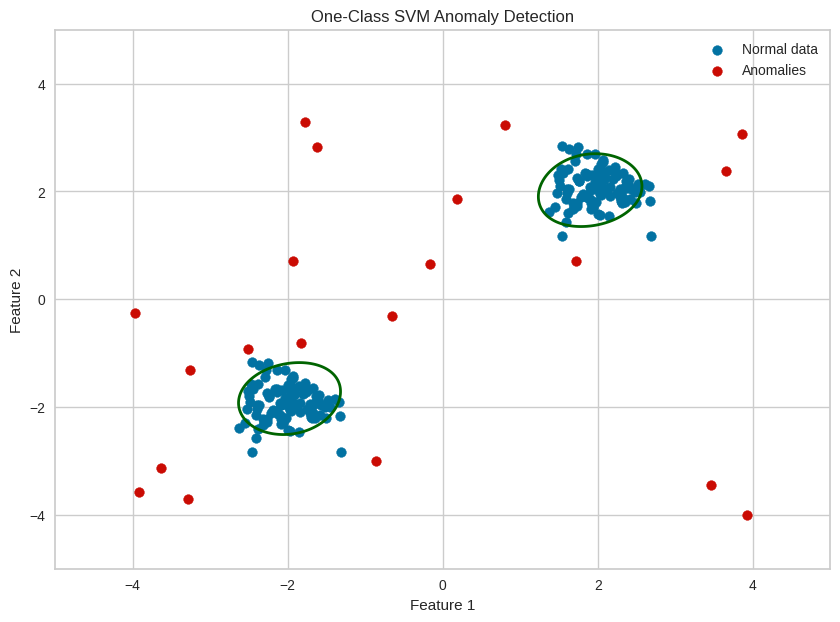

N√∫mero total de errores en data normal: 20
N√∫mero total de errores en outliers: 0
N√∫mero total de puntos en Normal Data: 200
N√∫mero total de outliers: 20


In [ ]:
from sklearn.svm import OneClassSVM
import numpy as np
import matplotlib.pyplot as plt

# Generar datos "normales"
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# Generar algunos datos "an√≥malos"
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Crear y ajustar el modelo One-Class SVM
oc_svm = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
oc_svm.fit(X_train)

# Detectar outliers y inliers (anomal√≠as y normales)
y_pred_train = oc_svm.predict(X_train)
y_pred_outliers = oc_svm.predict(X_outliers)

# Visualizaci√≥n
plt.figure(figsize=(10, 7))

# Dibujar puntos normales
plt.scatter(X_train[:, 0], X_train[:, 1], c='b', label="Normal data")

# Dibujar anomal√≠as
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='r', label="Anomalies")

# Dibujar la l√≠nea de decisi√≥n del modelo
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = oc_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkgreen')

plt.title("One-Class SVM Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Calculando la proporci√≥n de inliers y outliers detectados
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

print(f"N√∫mero total de errores en data normal: {n_error_train}")
print(f"N√∫mero total de errores en outliers: {n_error_outliers}")
print(f"N√∫mero total de puntos en Normal Data: {X_train.shape[0]}")
print(f"N√∫mero total de outliers: {X_outliers.shape[0]}")


- Los puntos "normales" agrupados alrededor de los centros, encapsulados dentro del l√≠mite de decisi√≥n.
- Los puntos "an√≥malos" situados fuera de este l√≠mite, destacando su naturaleza at√≠pica en comparaci√≥n con los datos "normales".
- El contorno generado por decision_function muestra el l√≠mite de decisi√≥n, que idealmente encapsula la mayor√≠a de los datos "normales" mientras excluye las anomal√≠as.

- N√∫mero de Errores en Datos Normales: Cu√°ntos puntos "normales" fueron incorrectamente etiquetados como anomal√≠as por el modelo.
- N√∫mero de Errores en Anomal√≠as: Cu√°ntos puntos an√≥malos fueron incorrectamente etiquetados como normales.
- Estas m√©tricas ofrecen una visi√≥n de la efectividad del modelo para aislar correctamente los datos an√≥malos de los normales.

Ahora repasemos las ventajas y desventajas de este modelo.

**Ventajas:**
- Efectivo en espacios de alta dimensi√≥n.
- No necesita datos de anomal√≠as para el entrenamiento.
- Capaz de detectar anomal√≠as complejas utilizando kernels.

**Desventajas:**
- La elecci√≥n del kernel y sus par√°metros puede ser complicada y no intuitiva.
- Sensible al par√°metro ŒΩ, que controla el n√∫mero de vectores de soporte y margen de error.
- Puede ser ineficiente en t√©rminos de tiempo de c√≥mputo y uso de memoria con grandes conjuntos de datos.

One-Class SVM proporciona un enfoque poderoso y flexible para la detecci√≥n de anomal√≠as, especialmente √∫til en situaciones donde los datos "normales" son conocidos, pero las anomal√≠as son desconocidas o dif√≠ciles de definir expl√≠citamente.

Con esto POR FIN finalizamos nuestra unidad. Ahora veamos algo que suena muy apantallante. Algoritmos de aprendizaje por refuerzo.

